In [1]:
import pandas as pd

## load datasets

In [4]:
train_provider = pd.read_csv('./Data/Train-1542865627584.csv')
train_beneficiary = pd.read_csv('./Data/Train_Beneficiarydata-1542865627584.csv')
train_inpatient = pd.read_csv('./Data/Train_Inpatientdata-1542865627584.csv')
train_outpatient = pd.read_csv('./Data/Train_Outpatientdata-1542865627584.csv')

test_provider = pd.read_csv('./Data/Test-1542969243754.csv')
test_beneficiary = pd.read_csv('./Data/Test_Beneficiarydata-1542969243754.csv')
test_inpatient = pd.read_csv('./Data/Test_Inpatientdata-1542969243754.csv')
test_outpatient = pd.read_csv('./Data/Test_Outpatientdata-1542969243754.csv')

In [5]:
print('Shape of train_provider data :', train_provider.shape)
print('Shape of train_inpatient data :', train_inpatient.shape)
print('Shape of train_outpatient data :', train_outpatient.shape)
print('Shape of train_beneficiary data :', train_beneficiary.shape)
print ('\n')
print('Shape of test_provider data :', test_provider.shape)
print('Shape of test_inpatient data :', test_inpatient.shape)
print('Shape of test_outpatient data :', test_outpatient.shape)
print('Shape of test_beneficiary data :', test_beneficiary.shape)

Shape of train_provider data : (5410, 2)
Shape of train_inpatient data : (40474, 30)
Shape of train_outpatient data : (517737, 27)
Shape of train_beneficiary data : (138556, 25)


Shape of test_provider data : (1353, 1)
Shape of test_inpatient data : (9551, 30)
Shape of test_outpatient data : (125841, 27)
Shape of test_beneficiary data : (63968, 25)


### Exploring Provider Data

In [6]:
train_provider

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [5]:
test_provider 

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018
...,...
1348,PRV57713
1349,PRV57726
1350,PRV57745
1351,PRV57749


#### Since test_provider was not labled, I'm using train datasets for this project.

In [7]:
train_provider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [8]:
train_provider.describe()

,Provider,PotentialFraud
count,5410,5410
unique,5410,2
top,PRV51001,No
freq,1,4904


In [9]:
train_provider.PotentialFraud.value_counts(normalize=True)

No     0.90647
Yes    0.09353
Name: PotentialFraud, dtype: float64

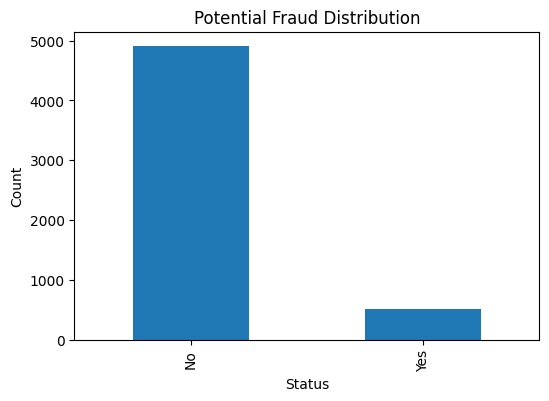

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Potential Fraud Distribution")
train_provider.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (6,4))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

### Exploring Beneficiary Data

In [13]:
train_beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [14]:
train_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [15]:
train_beneficiary.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,...,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [24]:
import seaborn as sns
sns.__version__
sns.set(style='whitegrid', palette='muted',font_scale=1.5)
from pylab import rcParams
rcParams['figure.figsize']=8,6

In [27]:
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()
    

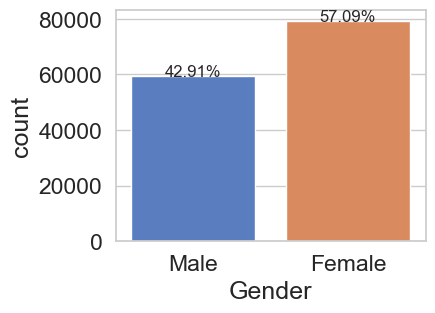

In [43]:
# Gender code 1 - Male; 2 - Female
plt.figure(figsize=(4, 3))
gender = train_beneficiary['Gender'].apply(lambda val: 'Male' if val ==1 else 'Female')
ax = sns.countplot(x = gender)
percentage_without_hue(ax, train_beneficiary['Gender'])


In [30]:
train_beneficiary['Race'].unique()

array([1, 2, 3, 5])

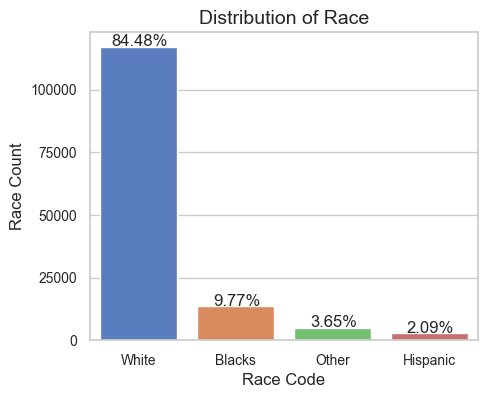

In [44]:
# Race code 1: White, 2: Black, 3: Other, 5: Hispaic
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Race',y=None, data=train_beneficiary, orient ="v", order = train_beneficiary['Race'].value_counts().index)
plt.title('Distribution of Race', fontsize=14)
plt.xticks(labels = ['White','Blacks','Other','Hispanic'],ticks=[0,1,2,3],size = 10)
plt.yticks(size = 10)
plt.xlabel('Race Code', size = 12)
plt.ylabel('Race Count', size = 12)
percentage_without_hue(ax, train_beneficiary['Race'], 0.01, 200,12)

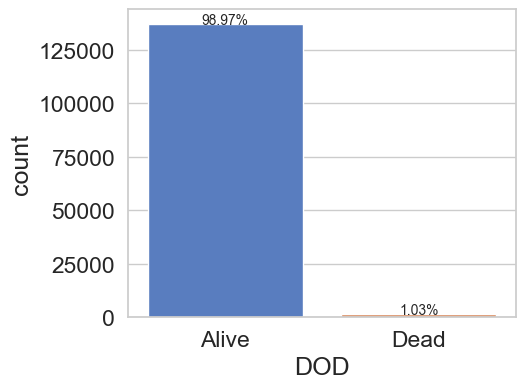

In [45]:
# Alive or dead
plt.figure(figsize=(5, 4))
dead_alive = train_beneficiary['DOD'].apply(lambda val: 'Alive' if val!=val else 'Dead')
ax = sns.countplot(x = dead_alive)
percentage_without_hue(ax, train_beneficiary['DOD'],0,20,10)


In [35]:
# Distribution of BirthYear
train_beneficiary['DOB'] =pd.to_datetime(train_beneficiary['DOB'],format="%Y-%m-%d")

<AxesSubplot: >

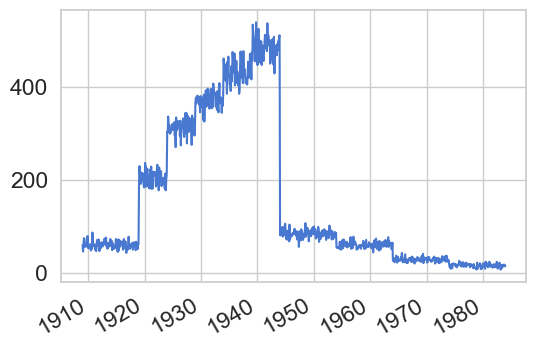

In [39]:
train_beneficiary.DOB.value_counts().plot(figsize = (6,4))

In [46]:
# Distribution of Age
# Calculate patient's age based on DOD, if DOD is not available calculate age based on the maximum date available in the data


In [50]:
Beneficiary=train_beneficiary
# Convert Date of Birth and Date of Death from String to Datetime format
Beneficiary['DOB'] = pd.to_datetime(train_beneficiary['DOB'] , format = '%Y-%m-%d')
Beneficiary['DOD'] = pd.to_datetime(train_beneficiary['DOD'],format = '%Y-%m-%d')

In [51]:
Beneficiary['DOD'].max()

Timestamp('2009-12-01 00:00:00')

In [52]:
Beneficiary['Patient_Age'] = round(((Beneficiary['DOD'] - Beneficiary['DOB']).dt.days)/365)
Beneficiary.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Beneficiary['DOB']).dt.days)/365),inplace=True)

/var/folders/tq/y0x9sdv94p3csstlrfs4v4gm0000gn/T/ipykernel_56192/657909806.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Beneficiary['Patient_Age'], kde = True, color ='green', bins = 20)


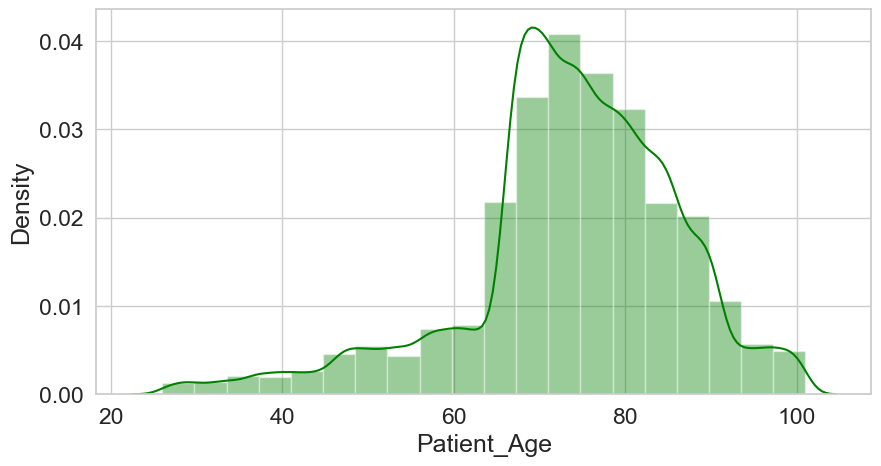

In [53]:
# Plot distribution of age
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(Beneficiary['Patient_Age'], kde = True, color ='green', bins = 20)
plt.show()

In [80]:
# Medicare is for patients above 65, or some deisabled patients below 65.

In [55]:
# has Renal Disease or not 
renal_disease = train_beneficiary['RenalDiseaseIndicator'].apply(lambda val: 'No' if val=='0' else 'Yes')

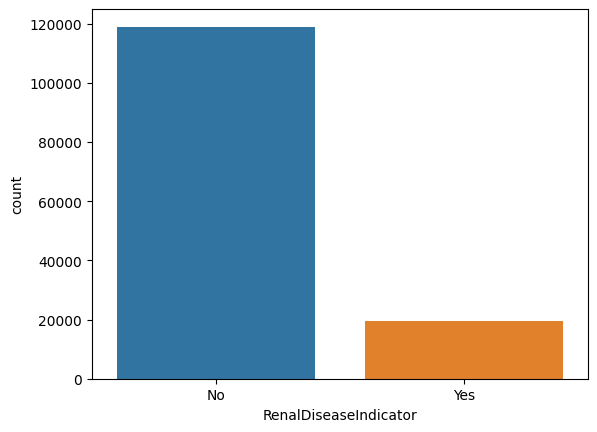

In [57]:
sns.countplot(x = renal_disease)
percentage_without_hue(ax, train_beneficiary['RenalDiseaseIndicator'])

In [58]:
# Chronic Conditions

In [59]:
def update_num(x):
    if x == 2:
        return 0
    else:
        return x

In [60]:
chronic = list(train_beneficiary.columns)[10:21]

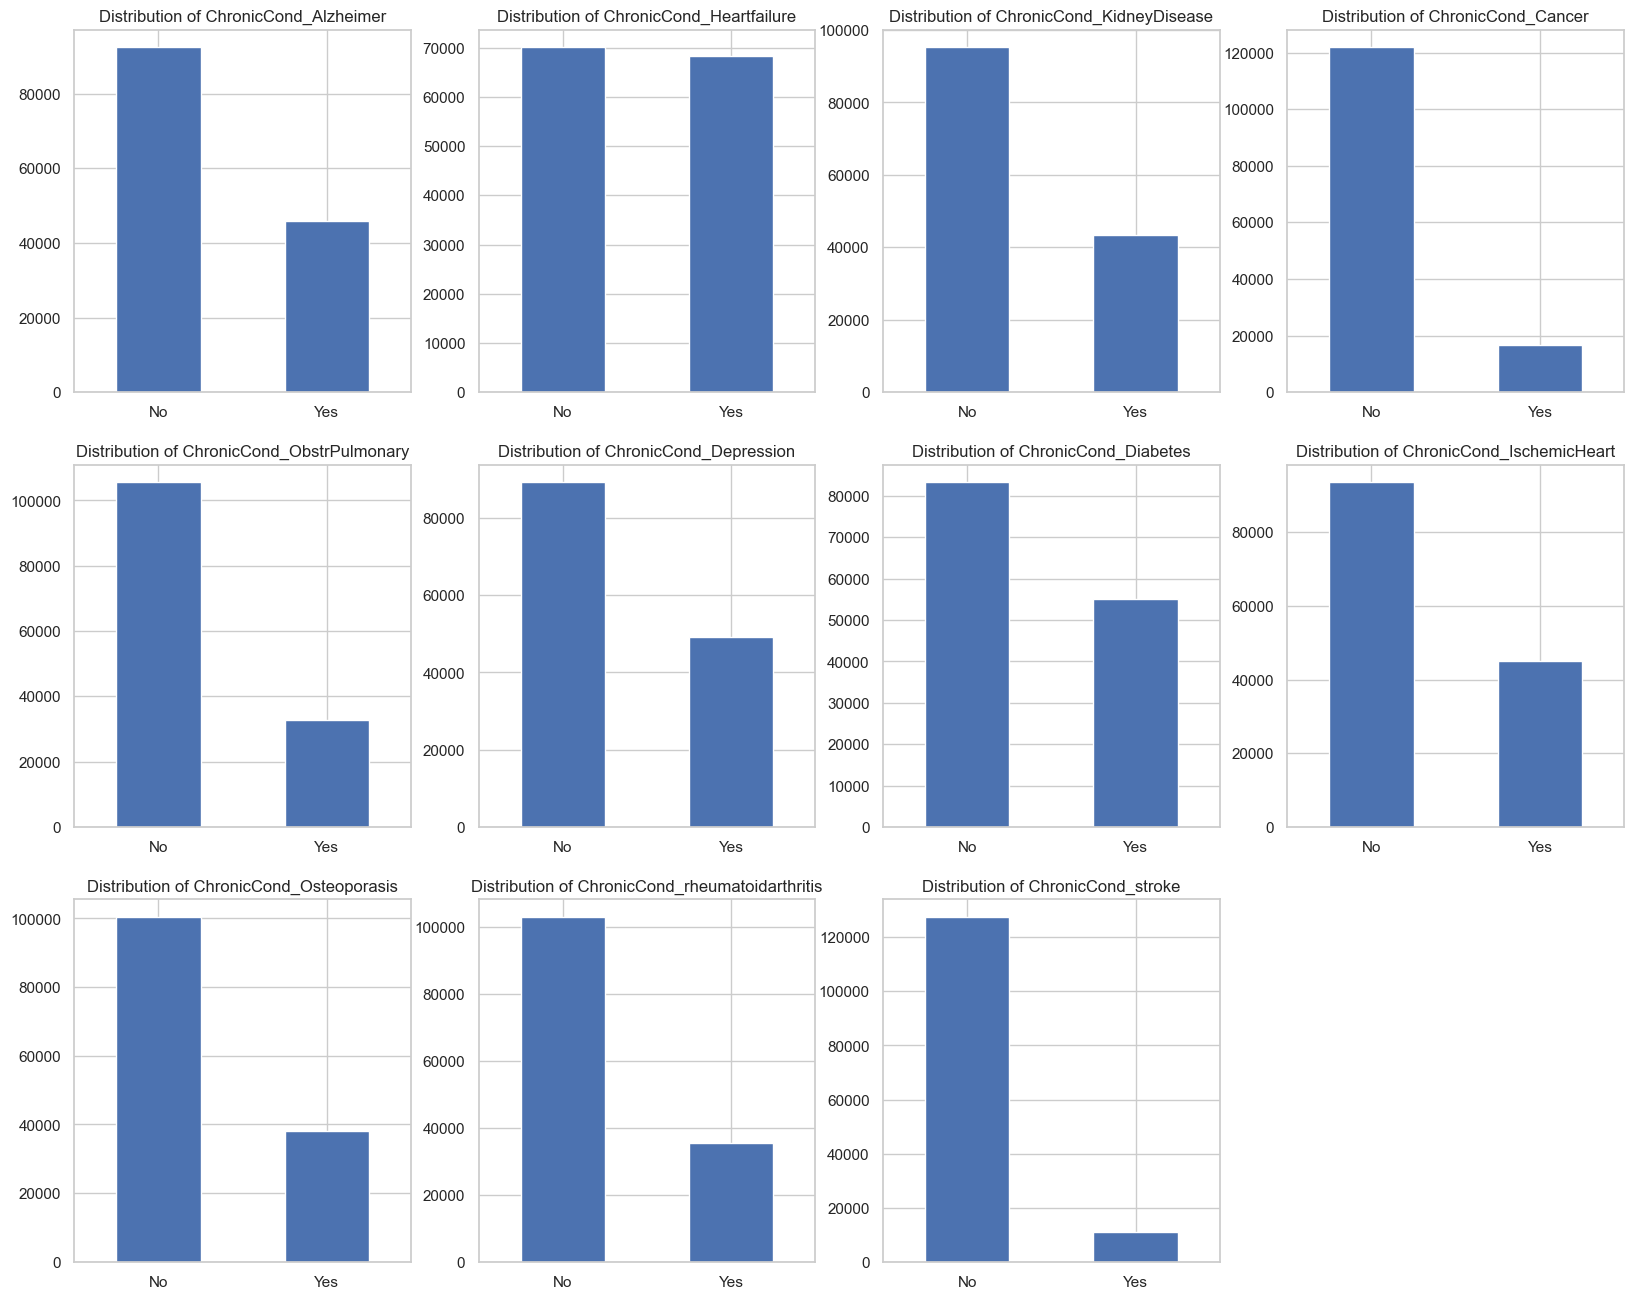

In [61]:
plt.figure(figsize=(20,16))
sns.set(font_scale= 1)
sns.set_style('whitegrid')

for i, feature in enumerate(chronic):
    plt.subplot(3,4,i+1)
    train_beneficiary.loc[:,feature].value_counts().plot(kind="bar",
                                                title = "Distribution of " + feature,
                                                )
    plt.xticks(labels=["No","Yes"], ticks=[0,1],rotation = 0)

In [63]:
# Patient Risk Score
# Replacing 2 with 0 for chronic conditions, Zero indicates chronic condition is No
Beneficiary = train_beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)
# For RenalDiseaseIndicator replacing 'Y' with 1
Beneficiary = Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

# convert all these columns datatypes to numeric
Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

# calculate patient risk score by summing up all the chronic conditions.
# The higher risk score indicates the health of the patient is not good
Beneficiary['Patient_Risk_Score'] = Beneficiary['ChronicCond_Alzheimer'] + Beneficiary['ChronicCond_Heartfailure'] + \
                                        Beneficiary['ChronicCond_KidneyDisease'] + Beneficiary['ChronicCond_Cancer'] +\
                                        Beneficiary['ChronicCond_ObstrPulmonary'] + Beneficiary['ChronicCond_Depression'] +\
                                    Beneficiary['ChronicCond_Diabetes'] + Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Beneficiary['ChronicCond_Osteoporasis'] + Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Beneficiary['ChronicCond_stroke'] + Beneficiary['RenalDiseaseIndicator'] 


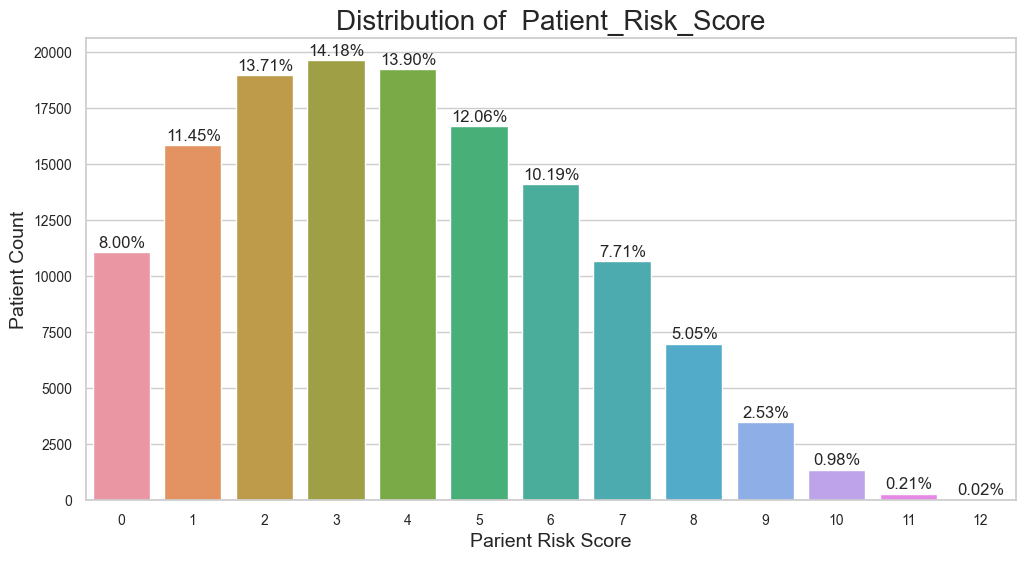

In [64]:
# Distribition of patient risk score
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Patient_Risk_Score',y=None, data=Beneficiary, orient ="v")
plt.title('Distribution of  Patient_Risk_Score', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Parient Risk Score', size = 14)
plt.ylabel('Patient Count', size = 14)
percentage_without_hue(ax, Beneficiary['Patient_Risk_Score'], 0.01, 200,12)

In [66]:
# normal distribution of patient risk score.
# Most of the patients with risk score 2, 3, 4, 5. Very few patients are there with risk score 9, 10, 11, 12

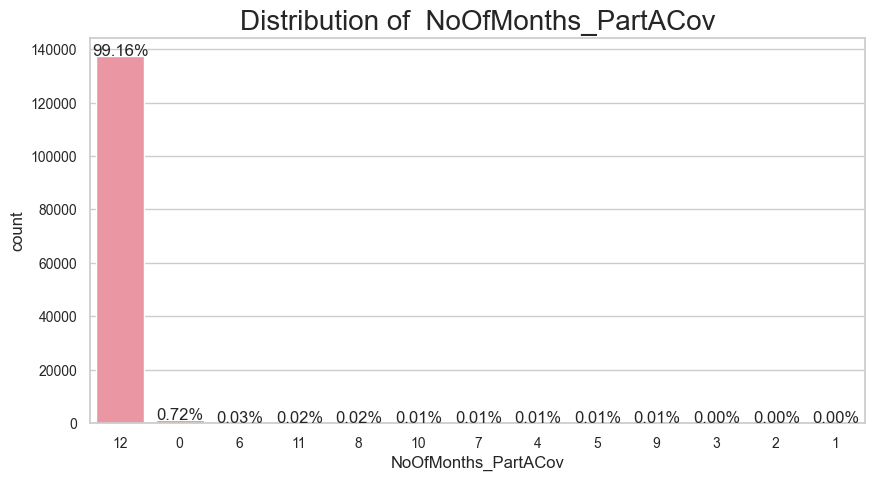

In [65]:
# Distribution of NoOfMonths_PartACov
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartACov',y=None, data=Beneficiary, orient ="v", order = Beneficiary['NoOfMonths_PartACov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartACov', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 14)
# plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, Beneficiary['Race'], 0.01, 200,12)

In [67]:
# 99% of patients covered PartA for 12 months

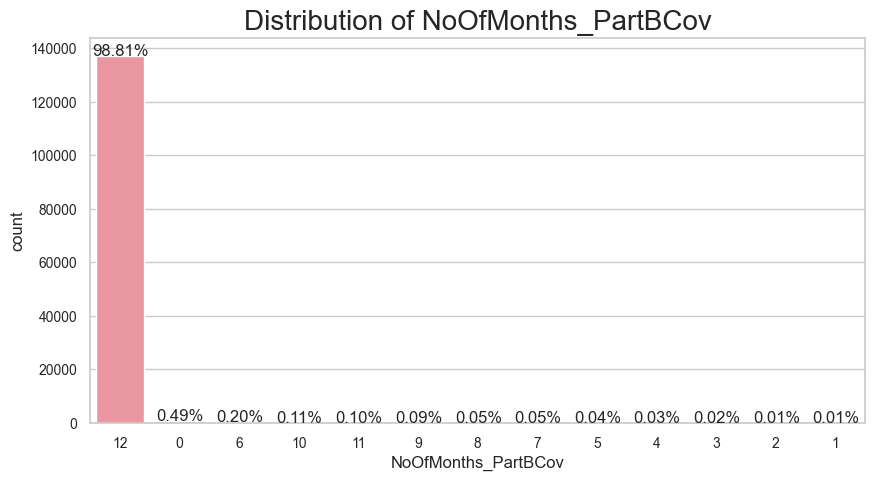

In [68]:
# Distribution of NoOfMonths_PartBCov
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartBCov',y=None, data=Beneficiary, orient ="v", order = Beneficiary['NoOfMonths_PartBCov'].value_counts().index)
plt.title('Distribution of NoOfMonths_PartBCov', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
percentage_without_hue(ax, Beneficiary['Race'], 0.01, 200,12)

In [ ]:
# 98% patients covered PartB for 12 months

In [ ]:
# Distribution of beneficiary based on State

<AxesSubplot: >

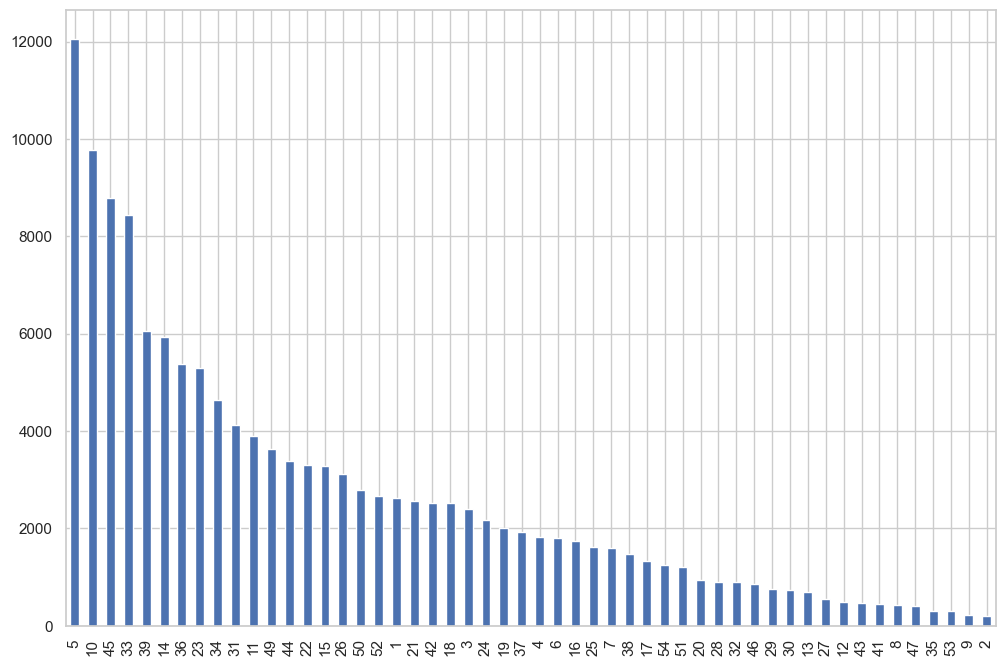

In [70]:
plt.figure(figsize=(12,8))
train_beneficiary['State'].value_counts().sort_values(ascending = False).plot(kind = 'bar')

/var/folders/tq/y0x9sdv94p3csstlrfs4v4gm0000gn/T/ipykernel_28330/2898769288.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Beneficiary['IPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)


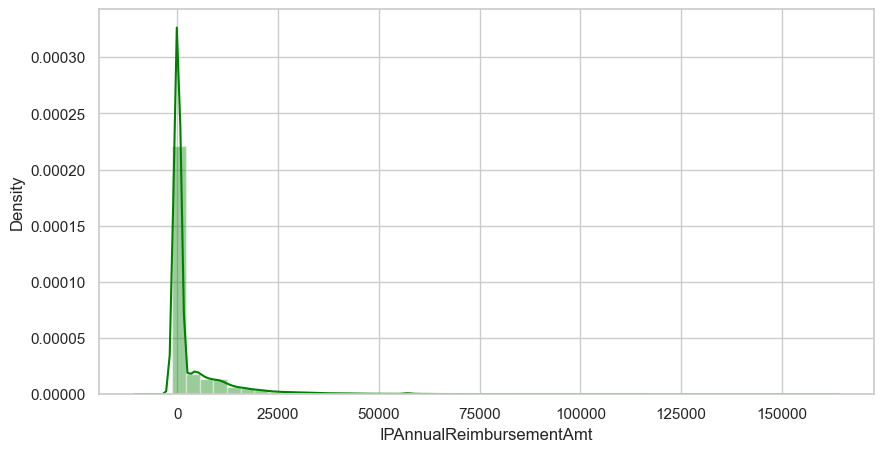

In [71]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.distplot(Beneficiary['IPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.show()

/var/folders/tq/y0x9sdv94p3csstlrfs4v4gm0000gn/T/ipykernel_28330/2297212183.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Beneficiary['IPAnnualDeductibleAmt'], kde = True, color ='green', bins = 50)


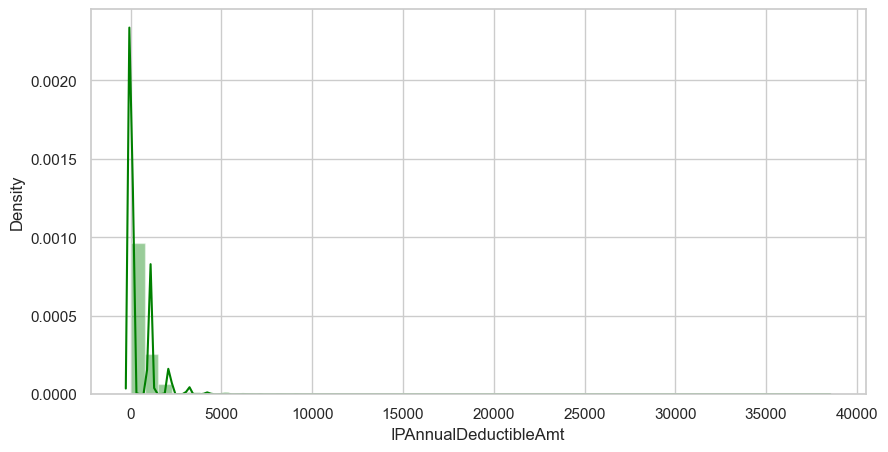

In [72]:
# Plot distribution of IPAnnualDeductibleAmt
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(Beneficiary['IPAnnualDeductibleAmt'], kde = True, color ='green', bins = 50)
plt.show()

/var/folders/tq/y0x9sdv94p3csstlrfs4v4gm0000gn/T/ipykernel_28330/204043407.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Beneficiary['OPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)


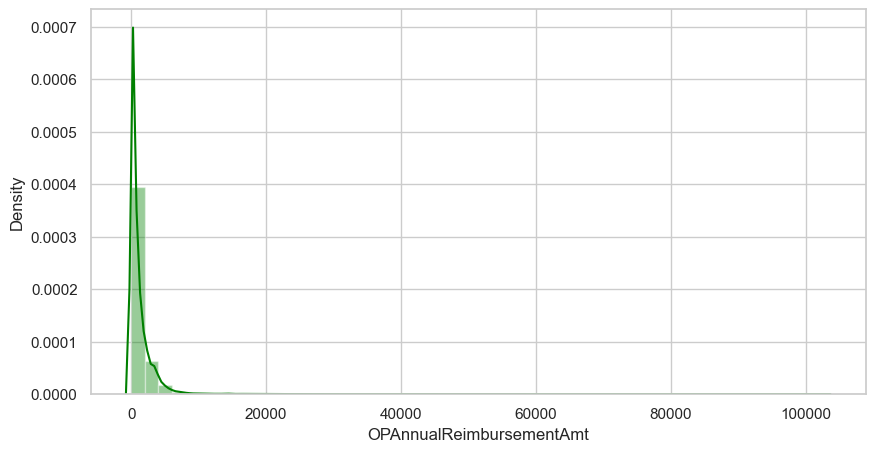

In [73]:
# Plot distribution of OPAnnualReimbursementAmt
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(Beneficiary['OPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.show()

/var/folders/tq/y0x9sdv94p3csstlrfs4v4gm0000gn/T/ipykernel_28330/2165877587.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Beneficiary['OPAnnualDeductibleAmt'], kde = True, color ='green', bins = 50)


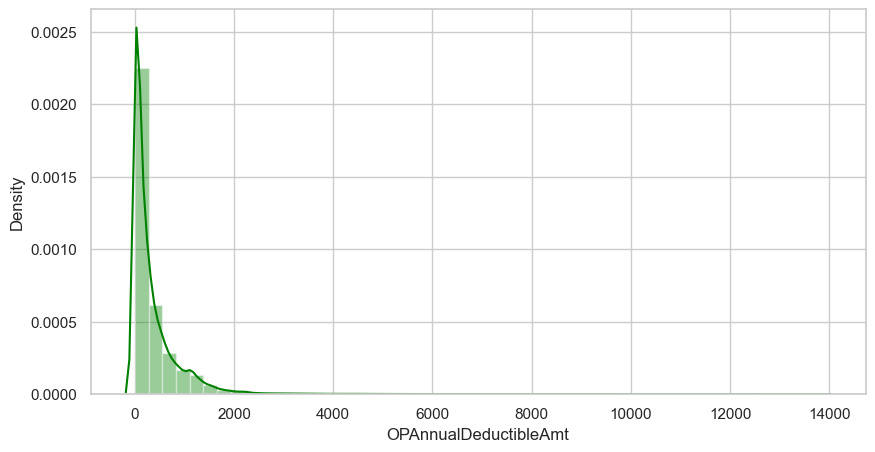

In [74]:
# Plot distribution of OPAnnualDeductibleAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.distplot(Beneficiary['OPAnnualDeductibleAmt'], kde = True, color ='green', bins = 50)
plt.show()

### Exploring In-patients Data

In [82]:
train_inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [83]:
train_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [14]:
train_inpatient.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [86]:
train_inpatient['ClaimStartDt'] = pd.to_datetime(train_inpatient['ClaimStartDt'],format='%Y-%m-%d')
train_inpatient['ClaimEndDt'] = pd.to_datetime(train_inpatient['ClaimEndDt'],format='%Y-%m-%d')

In [87]:
claim_duration = (train_inpatient['ClaimEndDt']  - train_inpatient['ClaimStartDt'] ).dt.days

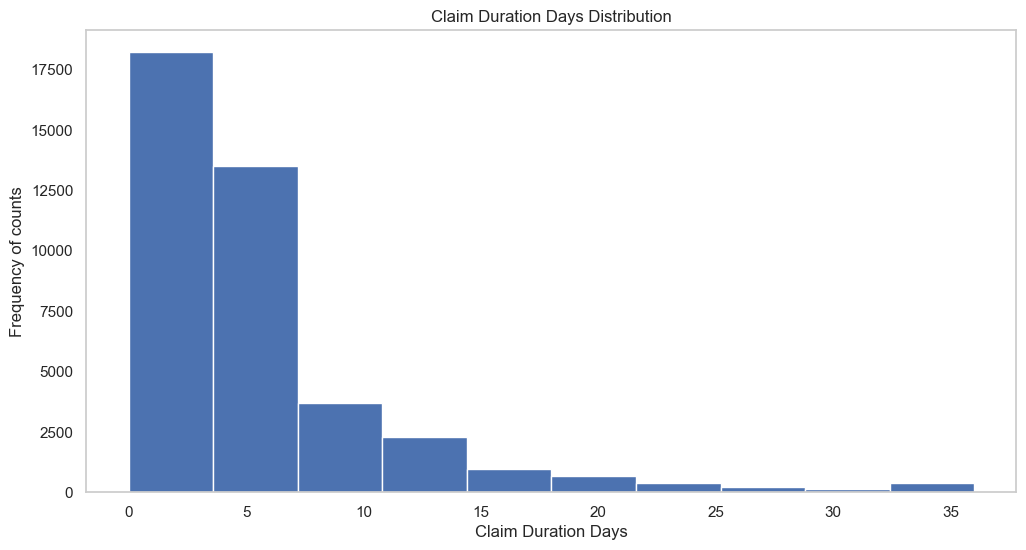

In [88]:
plt.figure(figsize = (12,6))
claim_duration.plot(kind = 'hist')
plt.xlabel('Claim Duration Days')
plt.ylabel('Frequency of counts')
plt.title('Claim Duration Days Distribution')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

In [89]:
train_inpatient['AdmissionDt'] = pd.to_datetime(train_inpatient['AdmissionDt'],format='%Y-%m-%d')
train_inpatient['DischargeDt'] = pd.to_datetime(train_inpatient['DischargeDt'],format='%Y-%m-%d')

In [90]:
admitted_days = (train_inpatient['DischargeDt'] - train_inpatient['AdmissionDt']).dt.days

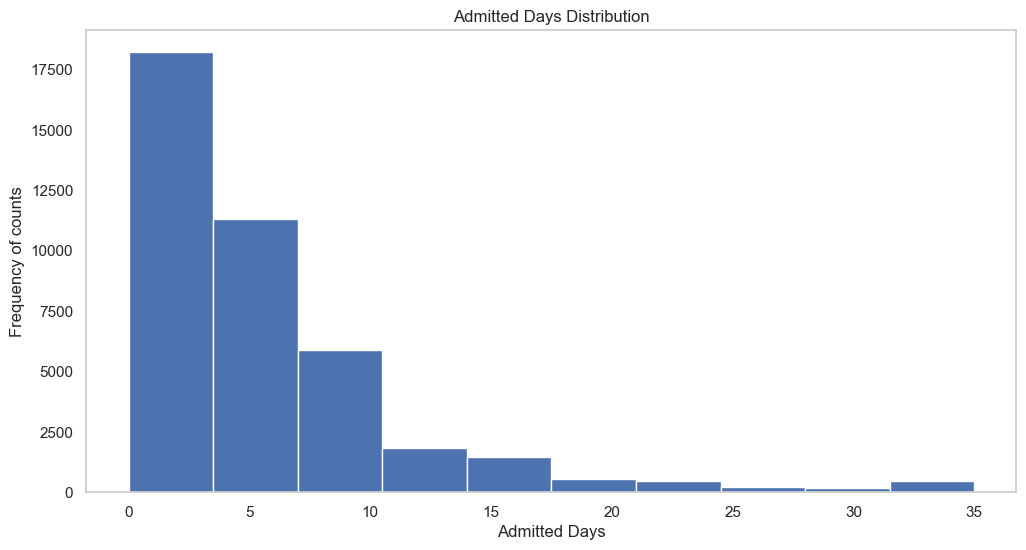

In [91]:
plt.figure(figsize = (12,6))
admitted_days.plot(kind = 'hist')
plt.xlabel('Admitted Days')
plt.ylabel('Frequency of counts')
plt.title('Admitted Days Distribution')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'PHY422134'),
  Text(1, 0, 'PHY341560'),
  Text(2, 0, 'PHY315112'),
  Text(3, 0, 'PHY411541'),
  Text(4, 0, 'PHY362864'),
  Text(5, 0, 'PHY431177'),
  Text(6, 0, 'PHY429938'),
  Text(7, 0, 'PHY314410'),
  Text(8, 0, 'PHY429828'),
  Text(9, 0, 'PHY400274'),
  Text(10, 0, 'PHY412508'),
  Text(11, 0, 'PHY430367'),
  Text(12, 0, 'PHY396496'),
  Text(13, 0, 'PHY329774'),
  Text(14, 0, 'PHY404394'),
  Text(15, 0, 'PHY339670'),
  Text(16, 0, 'PHY338562'),
  Text(17, 0, 'PHY376288'),
  Text(18, 0, 'PHY361948'),
  Text(19, 0, 'PHY327234')])

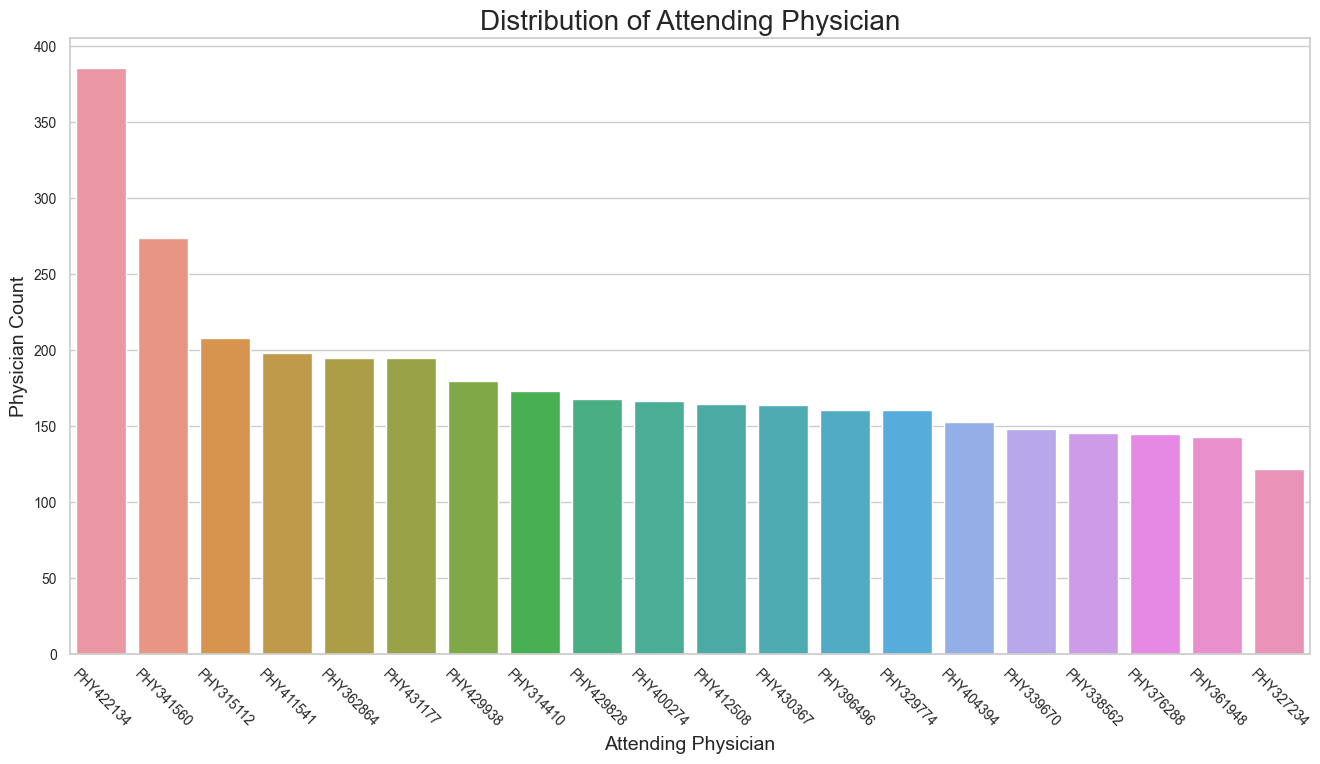

In [93]:
# Plot top 20 Attending Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AttendingPhysician',y=None, data=train_inpatient, orient ="v", order = train_inpatient['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of Attending Physician', fontsize=20)
plt.xlabel('Attending Physician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'PHY429430'),
  Text(1, 0, 'PHY341560'),
  Text(2, 0, 'PHY411541'),
  Text(3, 0, 'PHY352941'),
  Text(4, 0, 'PHY314410'),
  Text(5, 0, 'PHY362864'),
  Text(6, 0, 'PHY429828'),
  Text(7, 0, 'PHY430367'),
  Text(8, 0, 'PHY395464'),
  Text(9, 0, 'PHY377670'),
  Text(10, 0, 'PHY404394'),
  Text(11, 0, 'PHY354983'),
  Text(12, 0, 'PHY429938'),
  Text(13, 0, 'PHY412508'),
  Text(14, 0, 'PHY339670'),
  Text(15, 0, 'PHY376288'),
  Text(16, 0, 'PHY340233'),
  Text(17, 0, 'PHY338562'),
  Text(18, 0, 'PHY399458'),
  Text(19, 0, 'PHY376882')])

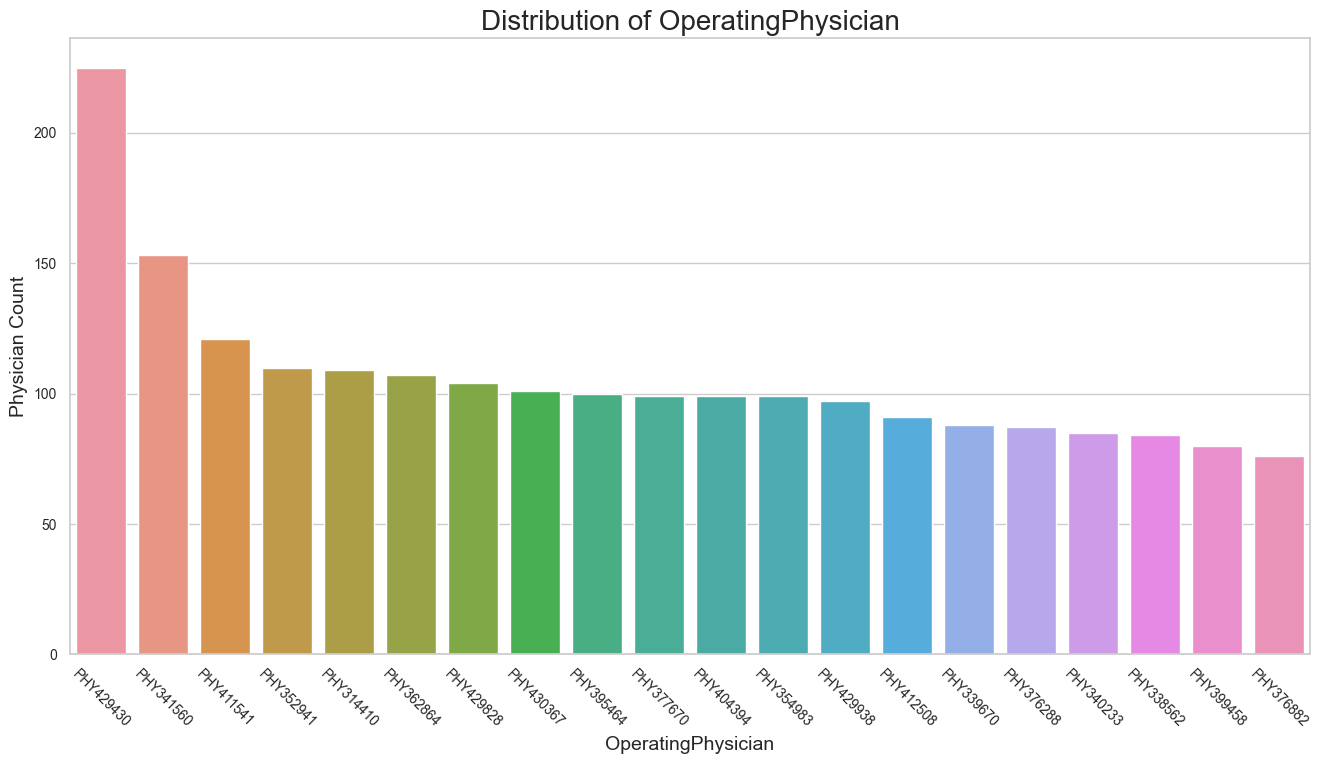

In [94]:
# Plot top 20 Operating Physician in terms of number of patients operated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OperatingPhysician',y=None, data=train_inpatient, orient ="v", order = train_inpatient['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of OperatingPhysician', fontsize=20)
plt.xlabel('OperatingPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'PHY416093'),
  Text(1, 0, 'PHY333406'),
  Text(2, 0, 'PHY429929'),
  Text(3, 0, 'PHY423728'),
  Text(4, 0, 'PHY361563'),
  Text(5, 0, 'PHY328051'),
  Text(6, 0, 'PHY361104'),
  Text(7, 0, 'PHY399458'),
  Text(8, 0, 'PHY392443'),
  Text(9, 0, 'PHY430721'),
  Text(10, 0, 'PHY382186'),
  Text(11, 0, 'PHY358829'),
  Text(12, 0, 'PHY327384'),
  Text(13, 0, 'PHY383873'),
  Text(14, 0, 'PHY396843'),
  Text(15, 0, 'PHY404537'),
  Text(16, 0, 'PHY329695'),
  Text(17, 0, 'PHY333908'),
  Text(18, 0, 'PHY352372'),
  Text(19, 0, 'PHY432365')])

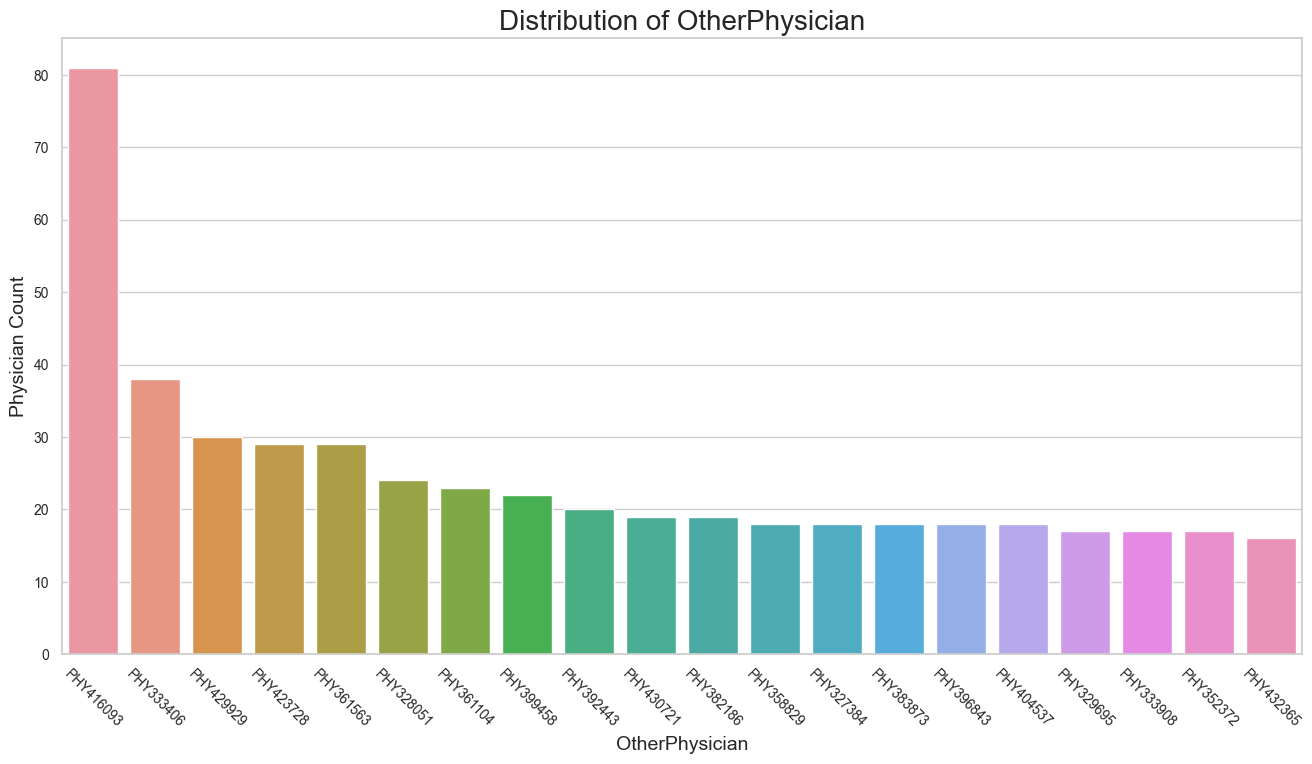

In [95]:
# Plot top 20 Other Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OtherPhysician',y=None, data=train_inpatient, orient ="v", order = train_inpatient['OtherPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of OtherPhysician', fontsize=20)
plt.xlabel('OtherPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'BENE134170'),
  Text(1, 0, 'BENE64791'),
  Text(2, 0, 'BENE121796'),
  Text(3, 0, 'BENE117116'),
  Text(4, 0, 'BENE119457'),
  Text(5, 0, 'BENE62091'),
  Text(6, 0, 'BENE120987'),
  Text(7, 0, 'BENE55873'),
  Text(8, 0, 'BENE119780'),
  Text(9, 0, 'BENE122820'),
  Text(10, 0, 'BENE28270'),
  Text(11, 0, 'BENE49263'),
  Text(12, 0, 'BENE83032'),
  Text(13, 0, 'BENE117983'),
  Text(14, 0, 'BENE78733'),
  Text(15, 0, 'BENE117262'),
  Text(16, 0, 'BENE124069'),
  Text(17, 0, 'BENE158042'),
  Text(18, 0, 'BENE130973'),
  Text(19, 0, 'BENE86751')])

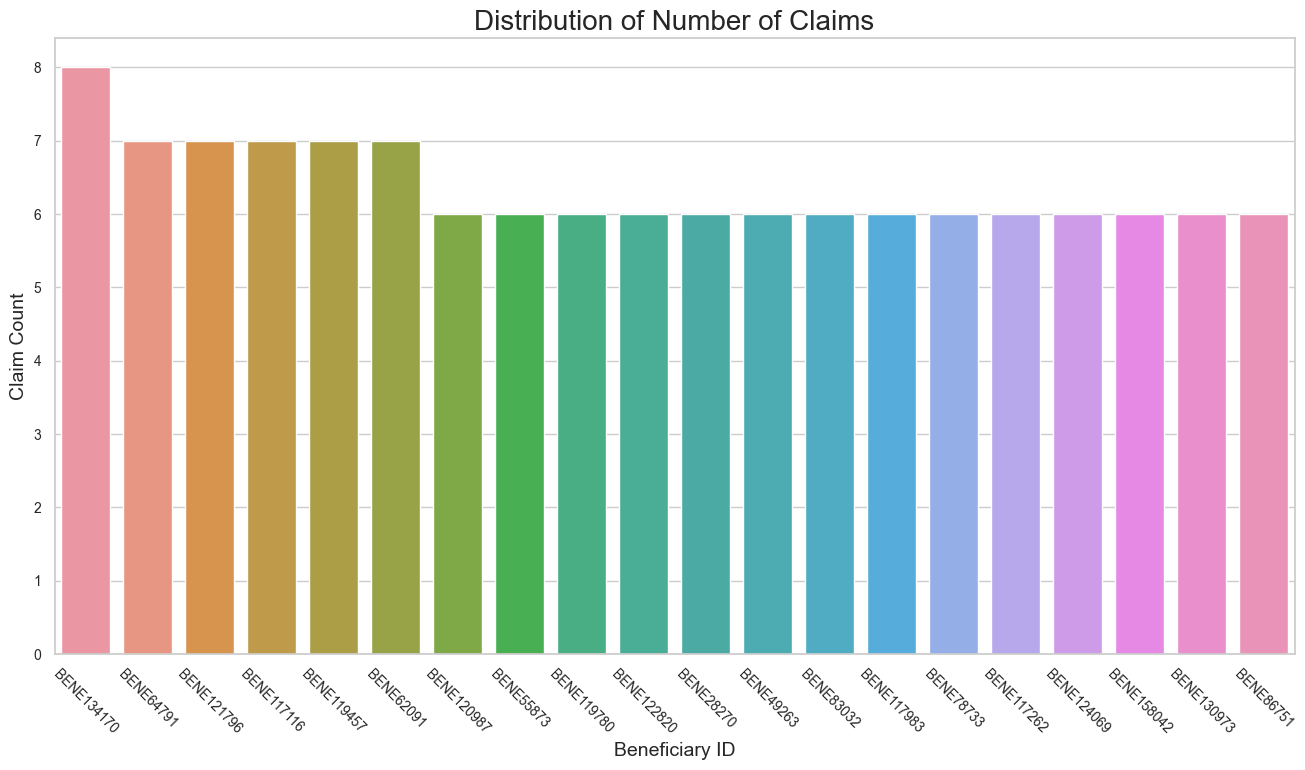

In [96]:
# Distribution of Number of Claims
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='BeneID',y=None, data=train_inpatient, orient ="v", order = train_inpatient['BeneID'].value_counts().head(20).index)
plt.title('Distribution of Number of Claims', fontsize=20)
plt.xlabel('Beneficiary ID', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)

In [97]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df['ProcedureCode'] = pd.concat([train_inpatient["ClmProcedureCode_1"], 
                                   train_inpatient["ClmProcedureCode_2"],
                                   train_inpatient["ClmProcedureCode_3"],
                                   train_inpatient["ClmProcedureCode_4"], 
                                   train_inpatient["ClmProcedureCode_5"], 
                                   train_inpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

In [98]:
ClmProcedureCode_IP_df['ProcedureCode']

1        7092.0
3         331.0
4        3893.0
5         863.0
6        4576.0
          ...  
11891    4139.0
15685    4139.0
26786    9971.0
27568    2724.0
33084    9982.0
Name: ProcedureCode, Length: 29692, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '4019.0'),
  Text(1, 0, '9904.0'),
  Text(2, 0, '2724.0'),
  Text(3, 0, '8154.0'),
  Text(4, 0, '66.0'),
  Text(5, 0, '3893.0'),
  Text(6, 0, '3995.0'),
  Text(7, 0, '4516.0'),
  Text(8, 0, '3722.0'),
  Text(9, 0, '8151.0'),
  Text(10, 0, '8872.0'),
  Text(11, 0, '9671.0'),
  Text(12, 0, '4513.0'),
  Text(13, 0, '5849.0'),
  Text(14, 0, '9390.0'),
  Text(15, 0, '9672.0'),
  Text(16, 0, '5123.0'),
  Text(17, 0, '7935.0'),
  Text(18, 0, '8152.0'),
  Text(19, 0, '9339.0')])

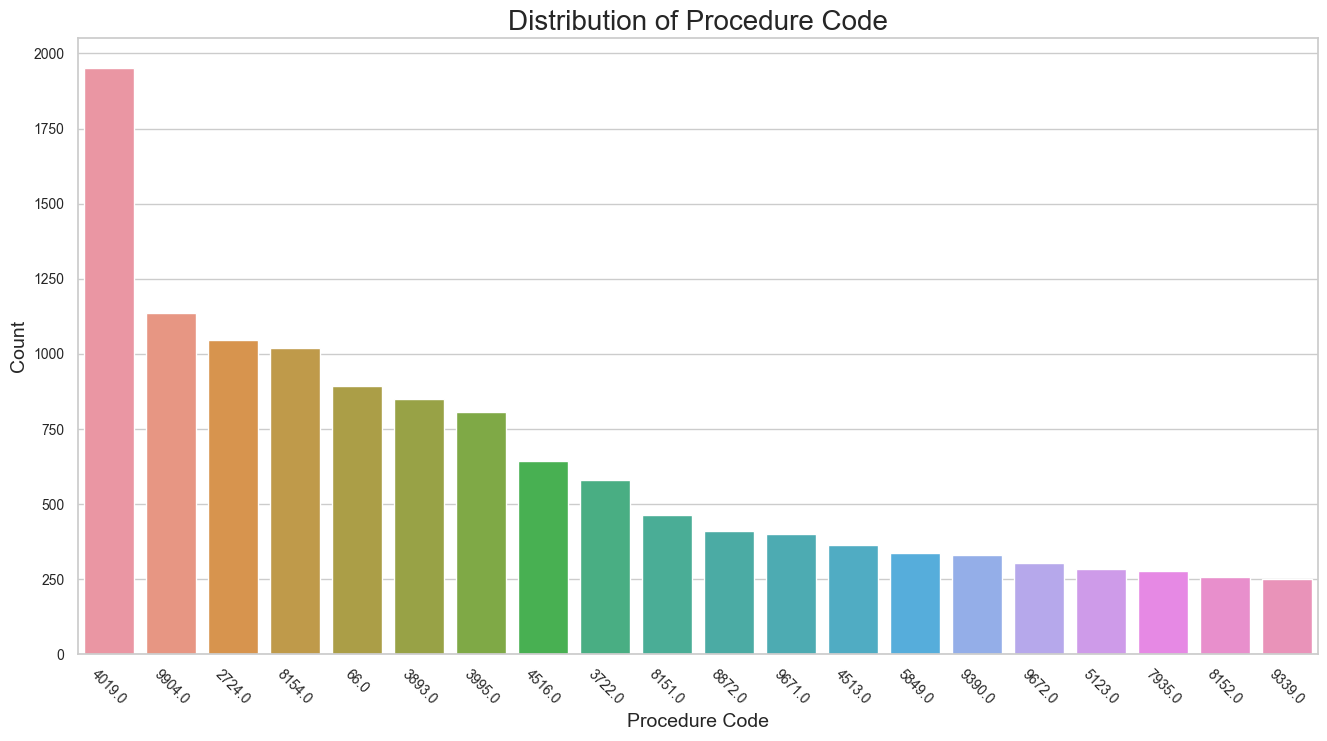

In [99]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_IP_df, orient ="v", order = ClmProcedureCode_IP_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)

In [100]:
#4019: Other Diagnostic Procedures On Lymphatic Structures 

In [101]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_IP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_IP_df['DiagnosisCode'] = pd.concat([train_inpatient["ClmDiagnosisCode_1"], 
                                           train_inpatient["ClmDiagnosisCode_2"], 
                                           train_inpatient["ClmDiagnosisCode_3"], 
                                           train_inpatient["ClmDiagnosisCode_4"],
                                           train_inpatient["ClmDiagnosisCode_5"], 
                                           train_inpatient["ClmDiagnosisCode_6"],
                                           train_inpatient["ClmDiagnosisCode_7"],
                                           train_inpatient["ClmDiagnosisCode_8"],
                                           train_inpatient["ClmDiagnosisCode_9"],
                                           train_inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

In [102]:
ClmDiagnosisCode_IP_df['DiagnosisCode'] 

0         1970
1         6186
2        29623
3        43491
4          042
         ...  
40432     5533
40456    V0481
40457     2875
40467     2724
40469     4148
Name: DiagnosisCode, Length: 327328, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '4019'),
  Text(1, 0, '2724'),
  Text(2, 0, '25000'),
  Text(3, 0, '41401'),
  Text(4, 0, '4280'),
  Text(5, 0, '42731'),
  Text(6, 0, '5990'),
  Text(7, 0, '53081'),
  Text(8, 0, '2449'),
  Text(9, 0, '5849'),
  Text(10, 0, '496'),
  Text(11, 0, '486'),
  Text(12, 0, '2859'),
  Text(13, 0, '40390'),
  Text(14, 0, '41400'),
  Text(15, 0, '2761'),
  Text(16, 0, '27651'),
  Text(17, 0, '3051'),
  Text(18, 0, '2768'),
  Text(19, 0, '2720')])

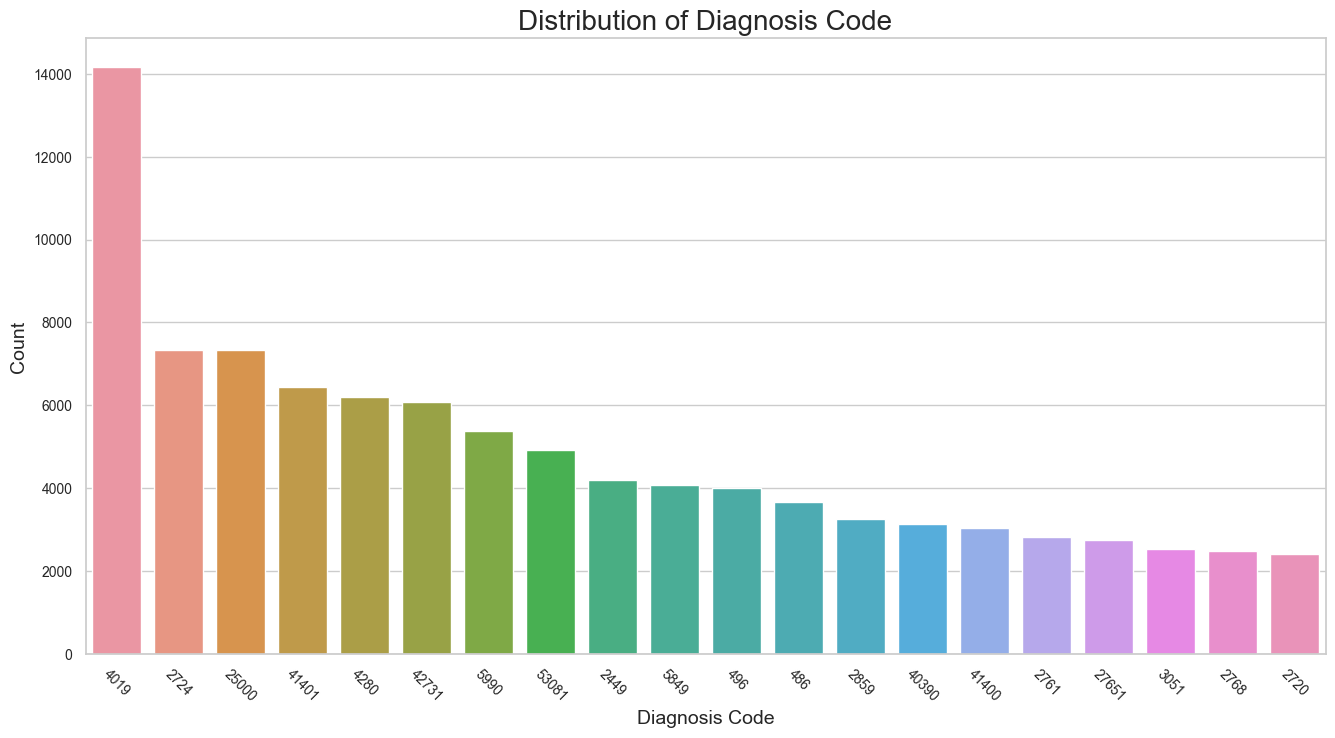

In [103]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_IP_df, orient ="v", order = ClmDiagnosisCode_IP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)

/var/folders/tq/y0x9sdv94p3csstlrfs4v4gm0000gn/T/ipykernel_28330/1913474464.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_inpatient['InscClaimAmtReimbursed'], kde = True, color ='green', bins = 50)


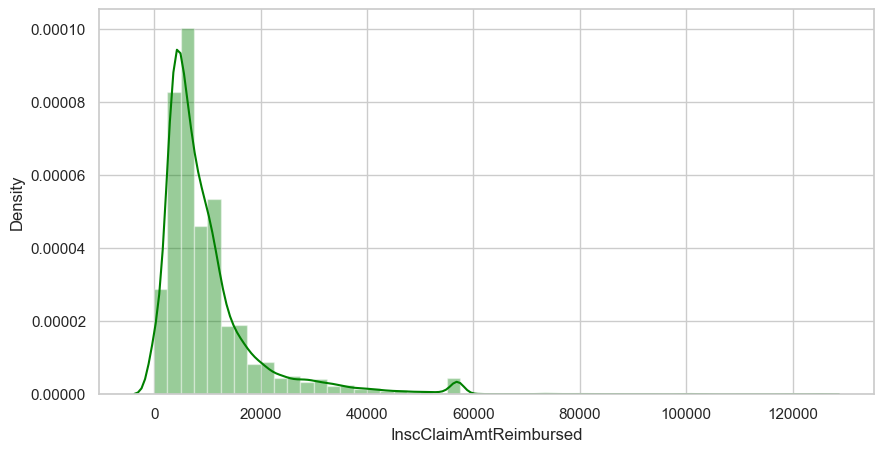

In [105]:
# Plot the distribution for InscClaimAmtReimbursed
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(train_inpatient['InscClaimAmtReimbursed'], kde = True, color ='green', bins = 50)
plt.show()

/var/folders/tq/y0x9sdv94p3csstlrfs4v4gm0000gn/T/ipykernel_28330/3468703676.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_inpatient['DeductibleAmtPaid'].dropna(), kde = False, color ='green', bins = 50)


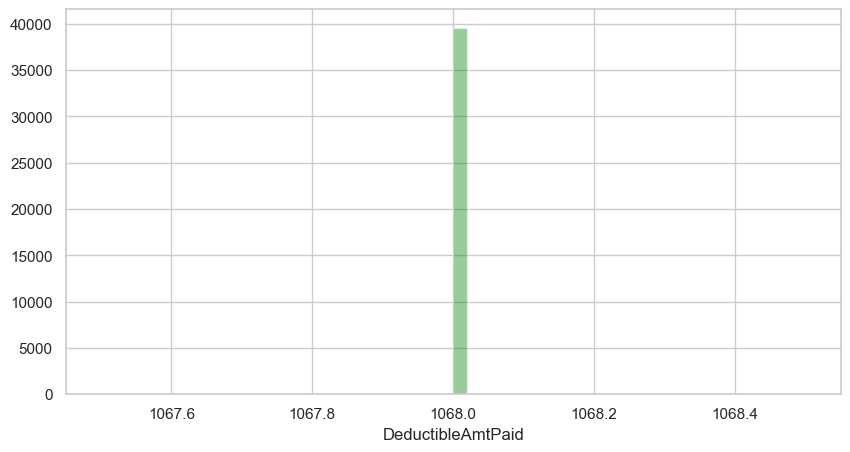

In [106]:
# Plot the distribution for DeductibleAmtPaid
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.distplot(train_inpatient['DeductibleAmtPaid'].dropna(), kde = False, color ='green', bins = 50)
plt.show()

In [ ]:
# DeductiableAmtPaid is 1068

### Exploring Out-patients Data

In [107]:
outpatient = pd.read_csv('../project/Train_Outpatientdata-1542865627584.csv')

In [108]:
outpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [109]:
outpatient['ClaimStartDt'] = pd.to_datetime(outpatient['ClaimStartDt'],format='%Y-%m-%d')
outpatient['ClaimEndDt'] = pd.to_datetime(outpatient['ClaimEndDt'],format='%Y-%m-%d')

In [110]:
claim_duration_outpa = (outpatient['ClaimEndDt']  - outpatient['ClaimStartDt'] ).dt.days

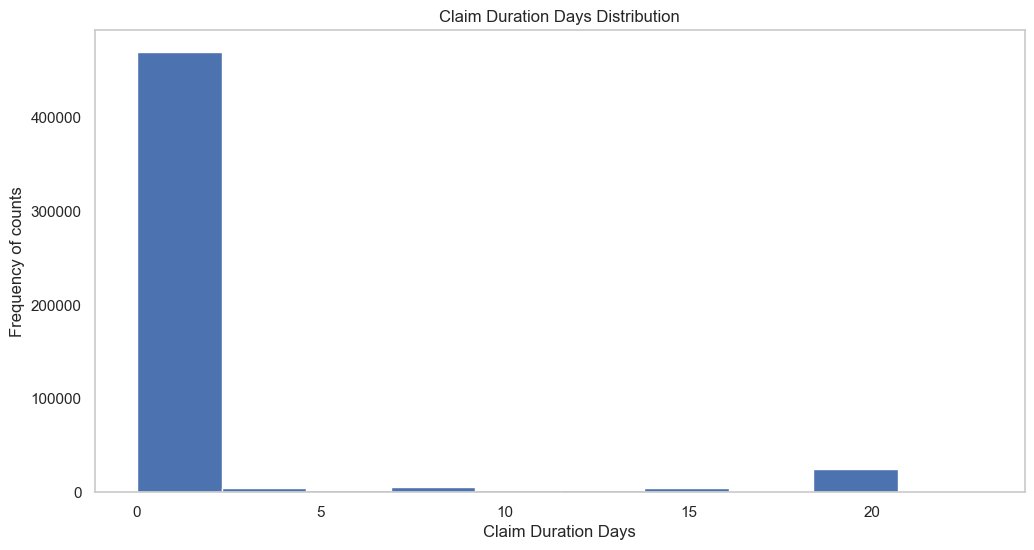

In [111]:
plt.figure(figsize = (12,6))
claim_duration_outpa.plot(kind = 'hist')
plt.xlabel('Claim Duration Days')
plt.ylabel('Frequency of counts')
plt.title('Claim Duration Days Distribution')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

In [ ]:
# 20days for outpatient claims seems unusual

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'PHY330576'),
  Text(1, 0, 'PHY350277'),
  Text(2, 0, 'PHY412132'),
  Text(3, 0, 'PHY423534'),
  Text(4, 0, 'PHY314027'),
  Text(5, 0, 'PHY327046'),
  Text(6, 0, 'PHY338032'),
  Text(7, 0, 'PHY337425'),
  Text(8, 0, 'PHY357120'),
  Text(9, 0, 'PHY341578'),
  Text(10, 0, 'PHY432650'),
  Text(11, 0, 'PHY347064'),
  Text(12, 0, 'PHY351121'),
  Text(13, 0, 'PHY383481'),
  Text(14, 0, 'PHY415321'),
  Text(15, 0, 'PHY344389'),
  Text(16, 0, 'PHY433436'),
  Text(17, 0, 'PHY375943'),
  Text(18, 0, 'PHY375453'),
  Text(19, 0, 'PHY387126')])

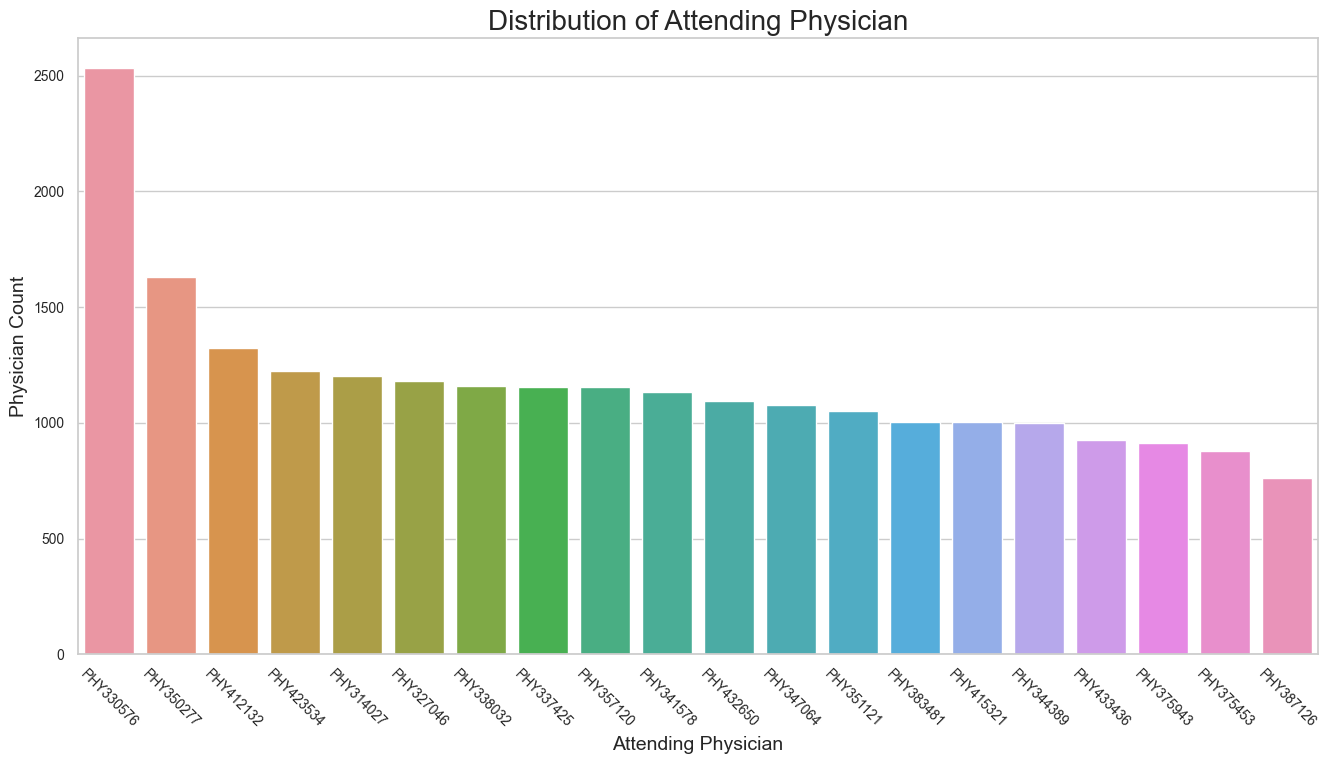

In [112]:
# Top 20 attending physician in terms of patient count
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AttendingPhysician',y=None, data=outpatient, orient ="v", order = outpatient['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of Attending Physician', fontsize=20)
plt.xlabel('Attending Physician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'PHY330576'),
  Text(1, 0, 'PHY424897'),
  Text(2, 0, 'PHY314027'),
  Text(3, 0, 'PHY423534'),
  Text(4, 0, 'PHY357120'),
  Text(5, 0, 'PHY412132'),
  Text(6, 0, 'PHY327046'),
  Text(7, 0, 'PHY333735'),
  Text(8, 0, 'PHY381249'),
  Text(9, 0, 'PHY337425'),
  Text(10, 0, 'PHY341578'),
  Text(11, 0, 'PHY383481'),
  Text(12, 0, 'PHY347064'),
  Text(13, 0, 'PHY387900'),
  Text(14, 0, 'PHY351121'),
  Text(15, 0, 'PHY432650'),
  Text(16, 0, 'PHY344389'),
  Text(17, 0, 'PHY415321'),
  Text(18, 0, 'PHY433436'),
  Text(19, 0, 'PHY375943')])

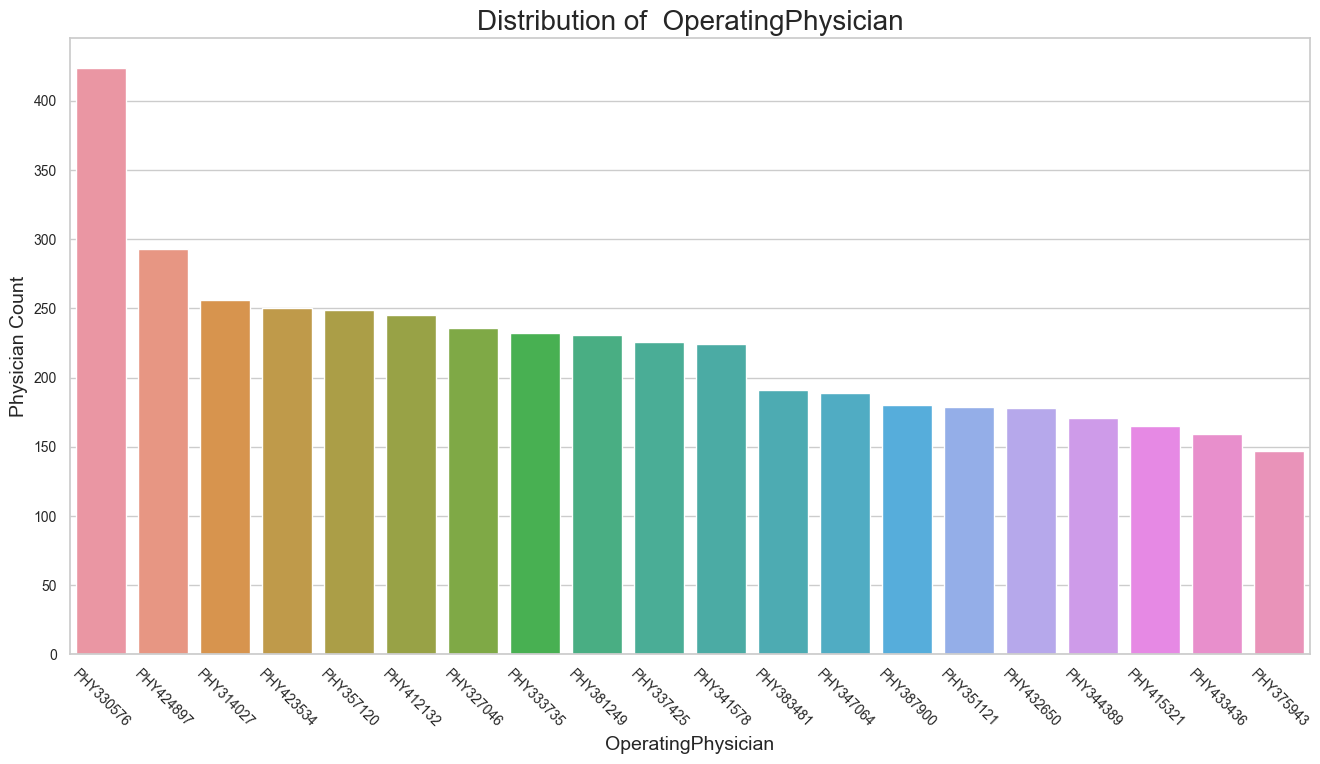

In [113]:
# Plot top 20 Operating Physician in terms of number of patients operated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OperatingPhysician',y=None, data=outpatient, orient ="v", order = outpatient['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OperatingPhysician', fontsize=20)
plt.xlabel('OperatingPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'PHY412132'),
  Text(1, 0, 'PHY341578'),
  Text(2, 0, 'PHY338032'),
  Text(3, 0, 'PHY337425'),
  Text(4, 0, 'PHY347064'),
  Text(5, 0, 'PHY322092'),
  Text(6, 0, 'PHY409965'),
  Text(7, 0, 'PHY313818'),
  Text(8, 0, 'PHY350277'),
  Text(9, 0, 'PHY415321'),
  Text(10, 0, 'PHY313278'),
  Text(11, 0, 'PHY359122'),
  Text(12, 0, 'PHY333735'),
  Text(13, 0, 'PHY416093'),
  Text(14, 0, 'PHY421058'),
  Text(15, 0, 'PHY359931'),
  Text(16, 0, 'PHY396637'),
  Text(17, 0, 'PHY336024'),
  Text(18, 0, 'PHY327964'),
  Text(19, 0, 'PHY422235')])

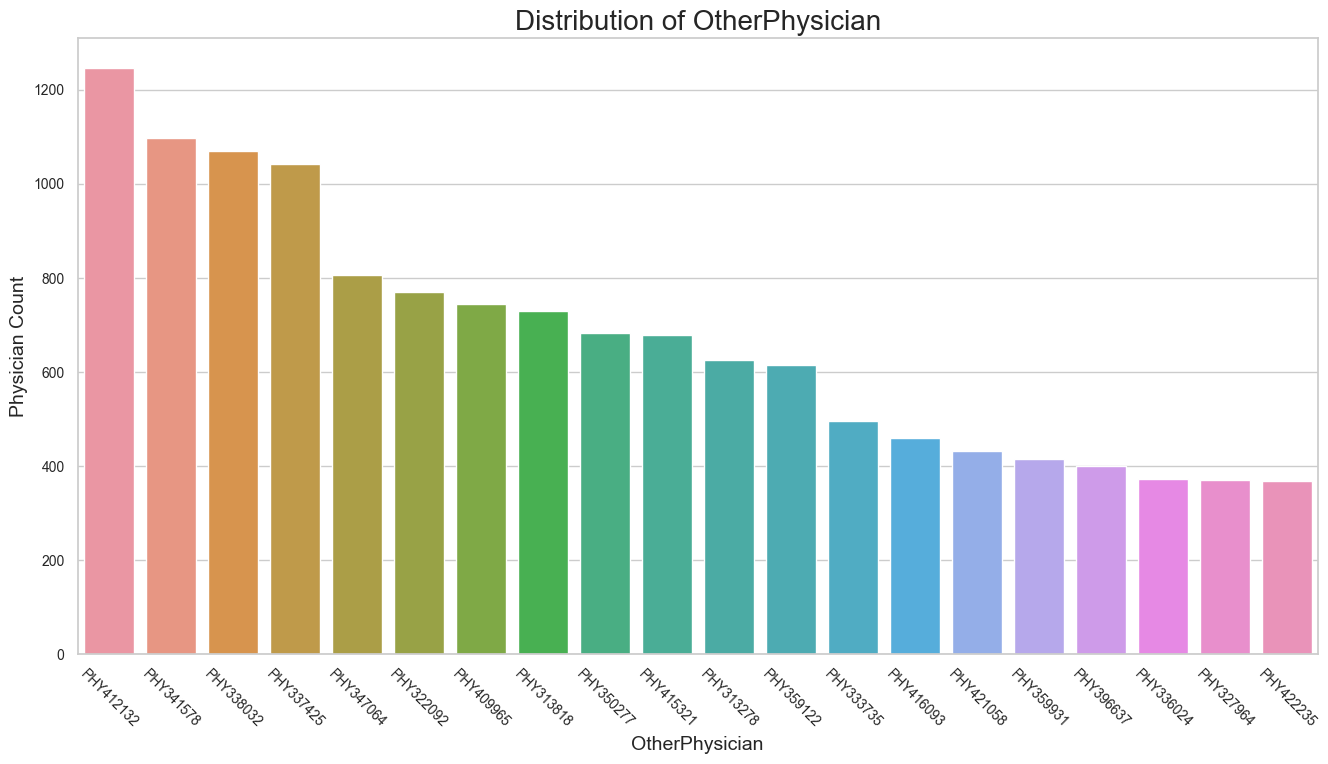

In [114]:
# Plot top 20 Other Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OtherPhysician',y=None, data=outpatient, orient ="v", order = outpatient['OtherPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of OtherPhysician', fontsize=20)
plt.xlabel('OtherPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'BENE42721'),
  Text(1, 0, 'BENE118316'),
  Text(2, 0, 'BENE143400'),
  Text(3, 0, 'BENE63544'),
  Text(4, 0, 'BENE63504'),
  Text(5, 0, 'BENE59303'),
  Text(6, 0, 'BENE36330'),
  Text(7, 0, 'BENE44241'),
  Text(8, 0, 'BENE87248'),
  Text(9, 0, 'BENE40202'),
  Text(10, 0, 'BENE158374'),
  Text(11, 0, 'BENE111593'),
  Text(12, 0, 'BENE34822'),
  Text(13, 0, 'BENE17000'),
  Text(14, 0, 'BENE80977'),
  Text(15, 0, 'BENE140460'),
  Text(16, 0, 'BENE81944'),
  Text(17, 0, 'BENE135580'),
  Text(18, 0, 'BENE28733'),
  Text(19, 0, 'BENE48451')])

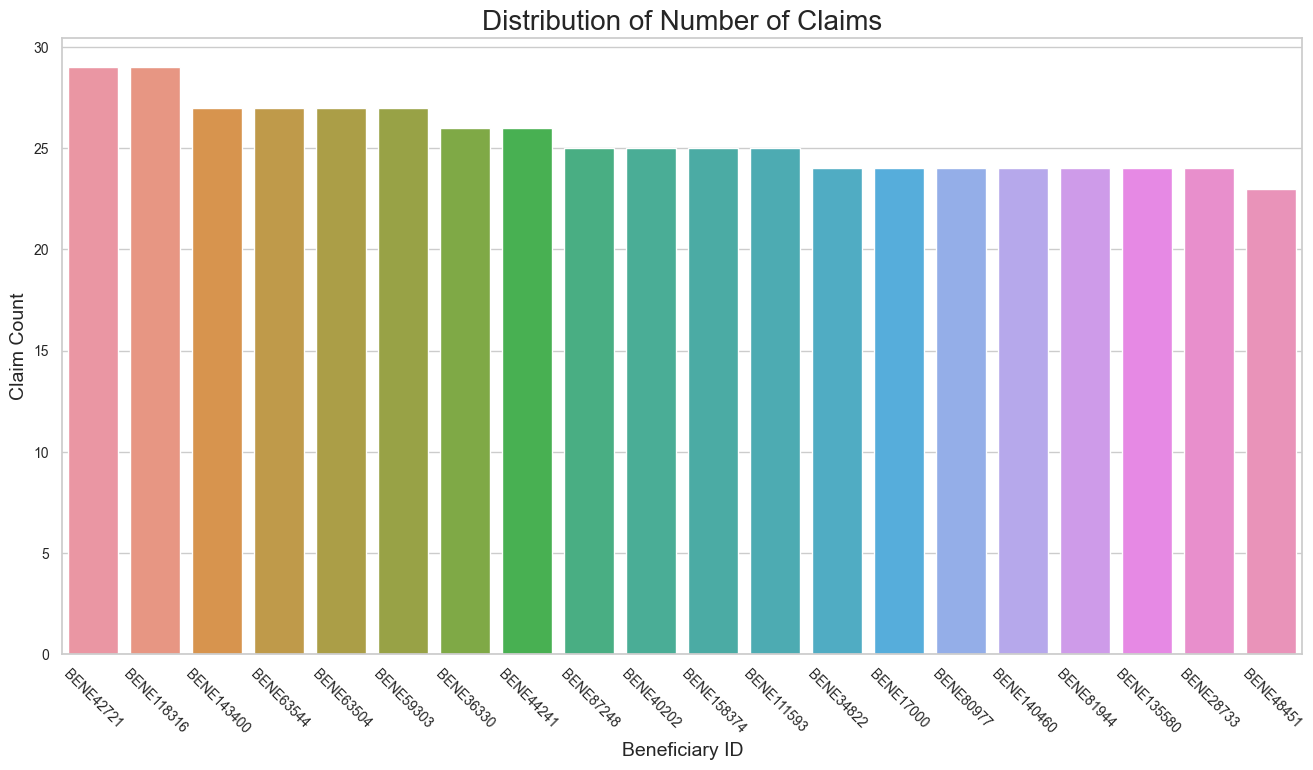

In [115]:
# Distribution of Number of Claims
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='BeneID',y=None, data=outpatient, orient ="v", order = outpatient['BeneID'].value_counts().head(20).index)
plt.title('Distribution of Number of Claims', fontsize=20)
plt.xlabel('Beneficiary ID', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)

In [ ]:
# max claims 29 for a year

In [116]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_OP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_OP_df['ProcedureCode'] = pd.concat([outpatient["ClmProcedureCode_1"], 
                                   outpatient["ClmProcedureCode_2"],
                                   outpatient["ClmProcedureCode_3"],
                                   outpatient["ClmProcedureCode_4"], 
                                   outpatient["ClmProcedureCode_5"], 
                                   outpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '9904.0'),
  Text(1, 0, '4516.0'),
  Text(2, 0, '3722.0'),
  Text(3, 0, '66.0'),
  Text(4, 0, '5123.0'),
  Text(5, 0, '2724.0'),
  Text(6, 0, '4019.0'),
  Text(7, 0, '9952.0'),
  Text(8, 0, '9672.0'),
  Text(9, 0, '3893.0'),
  Text(10, 0, '8152.0'),
  Text(11, 0, '9955.0'),
  Text(12, 0, '8622.0'),
  Text(13, 0, '3995.0'),
  Text(14, 0, '8703.0'),
  Text(15, 0, '4513.0'),
  Text(16, 0, '3895.0'),
  Text(17, 0, '9390.0'),
  Text(18, 0, '966.0'),
  Text(19, 0, '3723.0')])

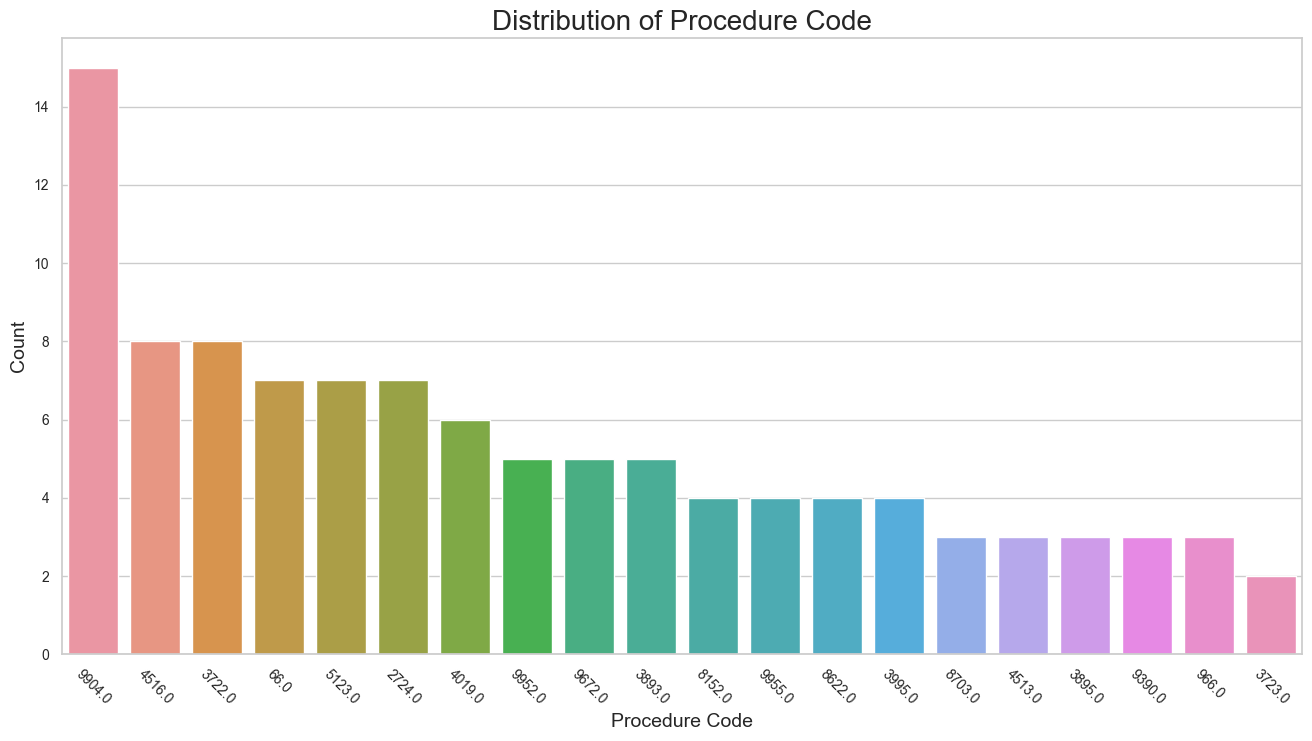

In [117]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_OP_df, orient ="v", order = ClmProcedureCode_OP_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)

In [118]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_OP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_OP_df['DiagnosisCode'] = pd.concat([outpatient["ClmDiagnosisCode_1"], 
                                           outpatient["ClmDiagnosisCode_2"], 
                                           outpatient["ClmDiagnosisCode_3"], 
                                           outpatient["ClmDiagnosisCode_4"],
                                           outpatient["ClmDiagnosisCode_5"], 
                                           outpatient["ClmDiagnosisCode_6"],
                                           outpatient["ClmDiagnosisCode_7"],
                                           outpatient["ClmDiagnosisCode_8"],
                                           outpatient["ClmDiagnosisCode_9"],
                                           outpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '4019'),
  Text(1, 0, '25000'),
  Text(2, 0, '2724'),
  Text(3, 0, 'V5869'),
  Text(4, 0, '4011'),
  Text(5, 0, 'V5861'),
  Text(6, 0, '2720'),
  Text(7, 0, '42731'),
  Text(8, 0, '2449'),
  Text(9, 0, '78079'),
  Text(10, 0, '53081'),
  Text(11, 0, '2859'),
  Text(12, 0, '496'),
  Text(13, 0, '4280'),
  Text(14, 0, '28521'),
  Text(15, 0, '41400'),
  Text(16, 0, '41401'),
  Text(17, 0, '2809'),
  Text(18, 0, '58881'),
  Text(19, 0, '3051')])

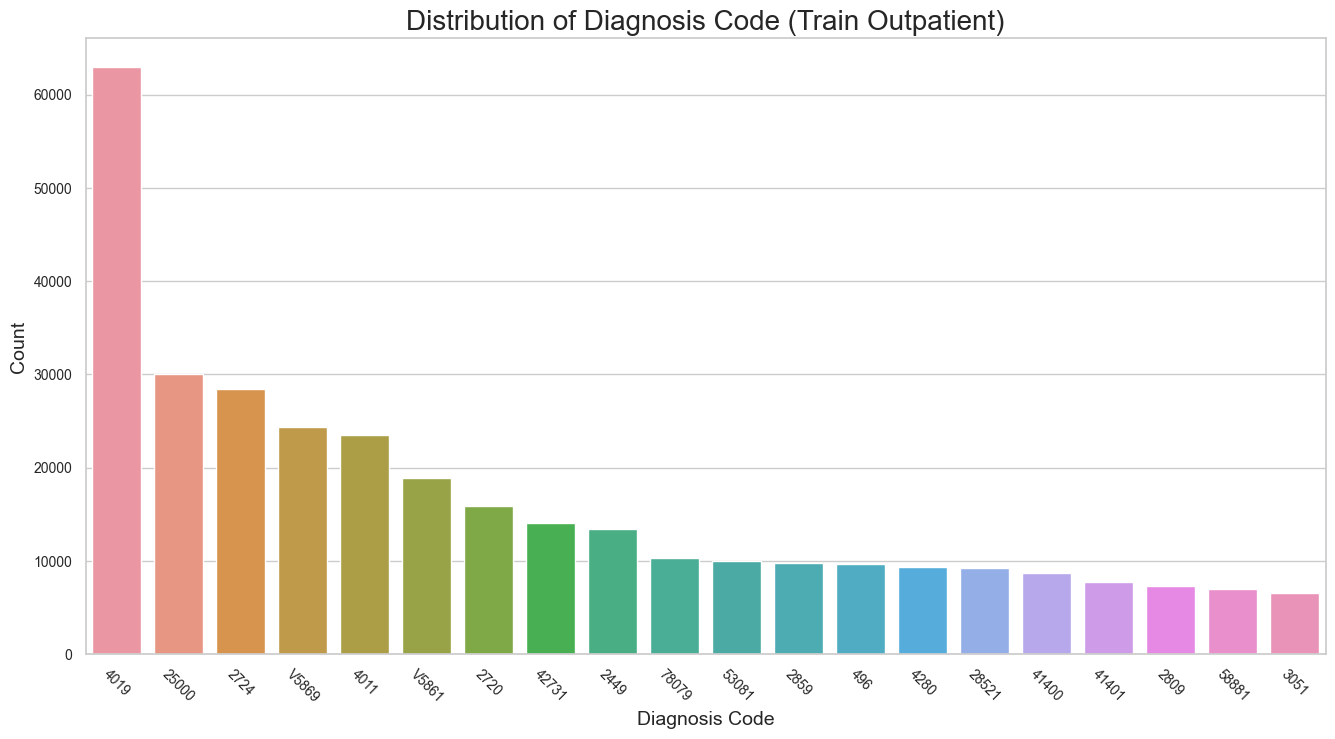

In [119]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_OP_df, orient ="v", order = ClmDiagnosisCode_OP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code (Train Outpatient)', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)

### Merge In-patient and Out-patient data

In [120]:
provider = pd.read_csv('../project/Train-1542865627584.csv')
beneficiary = pd.read_csv('../project/Train_Beneficiarydata-1542865627584.csv')
inpatient = pd.read_csv('../project/Train_Inpatientdata-1542865627584.csv')
outpatient = pd.read_csv('../project/Train_Outpatientdata-1542865627584.csv')

In [121]:
#create a column to identify inpatient or outpatient where inpatient = 1 and outpatient = 0
inpatient['inpatient_yn'] =1
outpatient['inpatient_yn']=0

In [122]:
# Merge inpatient and outpatient dataframes based on common columns
common_columns = [ idx for idx in outpatient.columns if idx in inpatient.columns]
print(common_columns)
inpatient_outpatient_merge = pd.merge(inpatient, outpatient, left_on = common_columns, right_on = common_columns,how = 'outer')

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'inpatient_yn']


In [123]:
#merge beneficiary data
inpatient_outpat_ben_merge = pd.merge(inpatient_outpatient_merge,beneficiary,left_on = 'BeneID',right_on='BeneID', how ='inner')

In [124]:
#merge provider data
df = pd.merge(inpatient_outpat_ben_merge,provider,on='Provider',how='inner')

### Exploring overall data

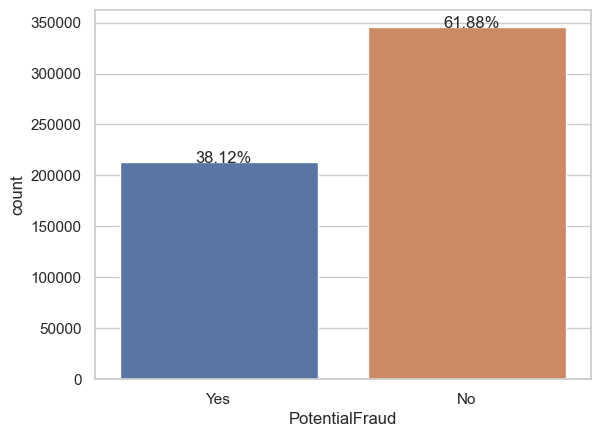

In [125]:
# Distribution of fraud by claims
ax = sns.countplot(x = df['PotentialFraud'])
percentage_without_hue(ax, df['PotentialFraud'], 0.02, 0.01, 12)

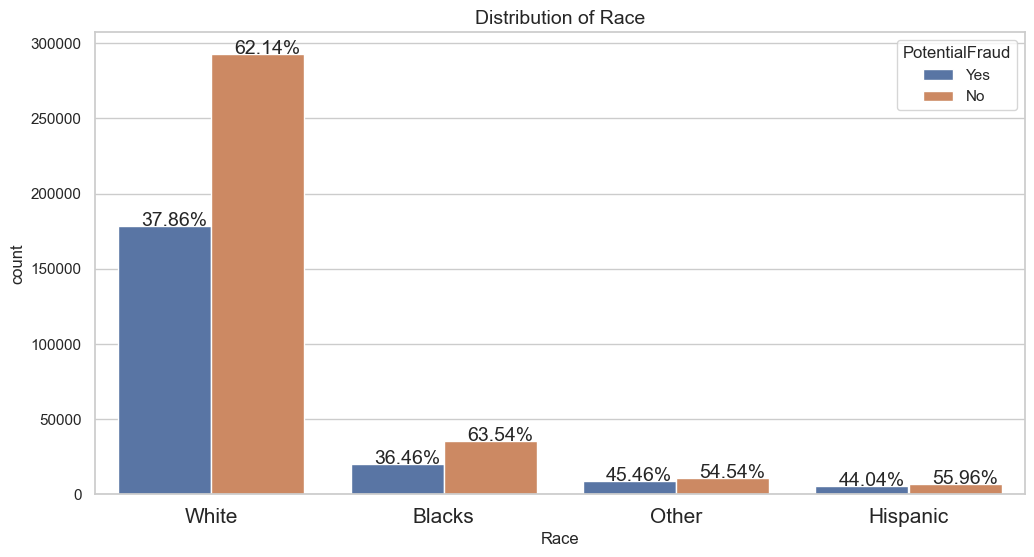

In [126]:
# Distribution of race in Overall data
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Race',y=None, data=df, hue="PotentialFraud", orient ="v",hue_order=['Yes','No'], order = df['Race'].value_counts().index)
plt.xticks(labels = ['White','Blacks','Other','Hispanic'],ticks=[0,1,2,3],size = 15)
plt.title('Distribution of Race', size = 14)
percentage_with_hue(ax, df.Race, 4,2,-0.1,200, 14)

In [ ]:
# Distribution of Procedure Code in Fraudulent Claims


In [127]:
# Concat all the claim precedurecodes in a single dataframe
df_fraud = df[df.PotentialFraud == 'Yes']
ClmProcedureCodeFraud_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCodeFraud_df['ProcedureCode'] = pd.concat([df_fraud["ClmProcedureCode_1"], 
                                   df_fraud["ClmProcedureCode_2"],
                                   df_fraud["ClmProcedureCode_3"],
                                   df_fraud["ClmProcedureCode_4"], 
                                   df_fraud["ClmProcedureCode_5"], 
                                   df_fraud["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

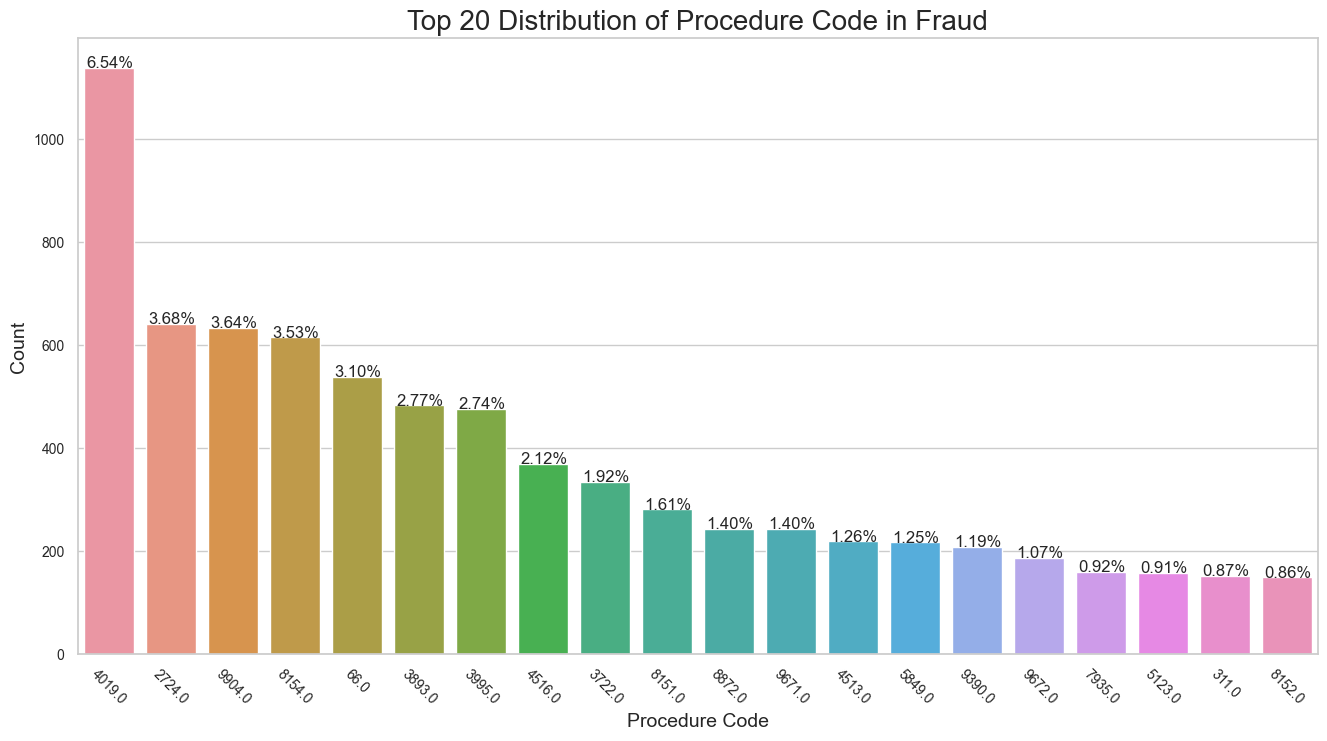

In [129]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCodeFraud_df, orient ="v", order = ClmProcedureCodeFraud_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Top 20 Distribution of Procedure Code in Fraud', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCodeFraud_df['ProcedureCode'], 0.02, 0.01, 12)

In [ ]:
#Distribution of Diagnosis Code in Fraudulent Claims


In [130]:
# Concat all the fraudlent claim DiagnosisCodes in a single dataframe 
ClmDiagnosisCodeFraud_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCodeFraud_df['DiagnosisCode'] = pd.concat([df_fraud["ClmDiagnosisCode_1"], 
                                           df_fraud["ClmDiagnosisCode_2"], 
                                           df_fraud["ClmDiagnosisCode_3"], 
                                           df_fraud["ClmDiagnosisCode_4"],
                                           df_fraud["ClmDiagnosisCode_5"], 
                                           df_fraud["ClmDiagnosisCode_6"],
                                           df_fraud["ClmDiagnosisCode_7"],
                                           df_fraud["ClmDiagnosisCode_8"],
                                           df_fraud["ClmDiagnosisCode_9"],
                                           df_fraud["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

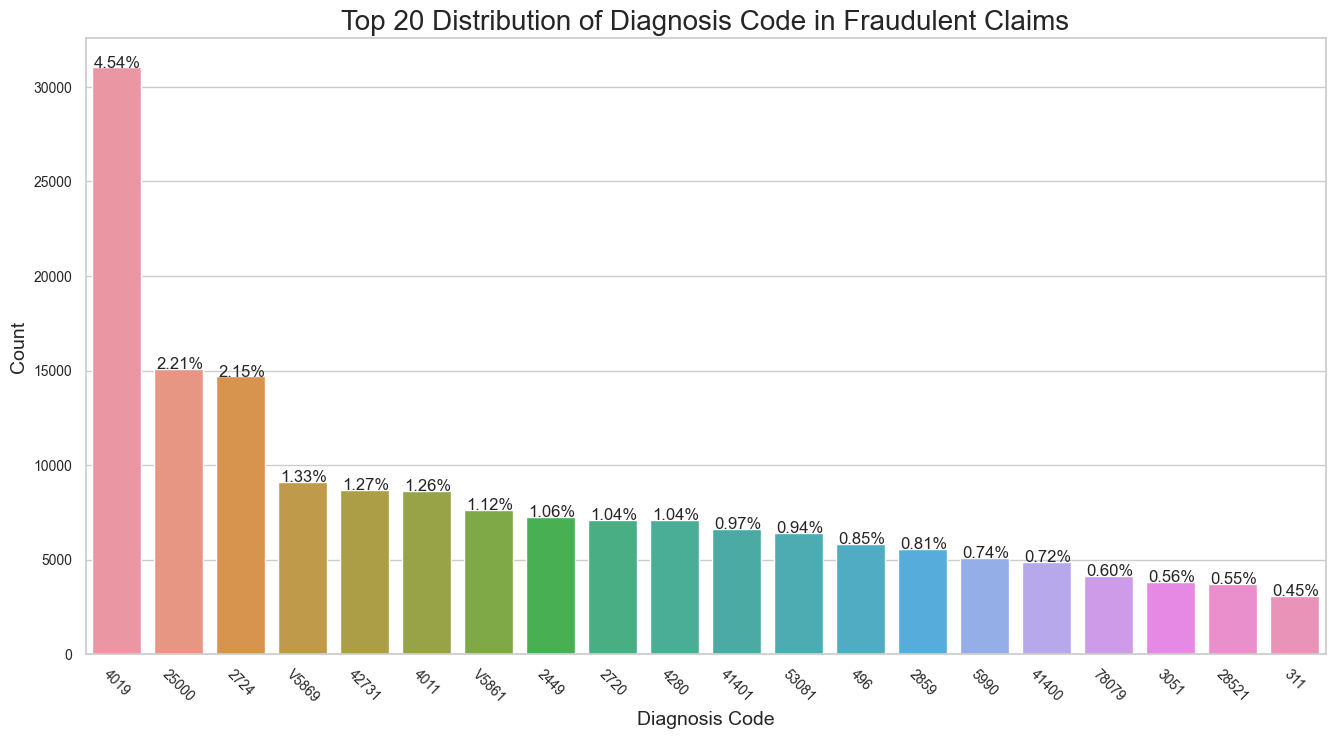

In [131]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCodeFraud_df, orient ="v", order = ClmDiagnosisCodeFraud_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Top 20 Distribution of Diagnosis Code in Fraudulent Claims', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCodeFraud_df['DiagnosisCode'], 0.02, 0.01, 12)

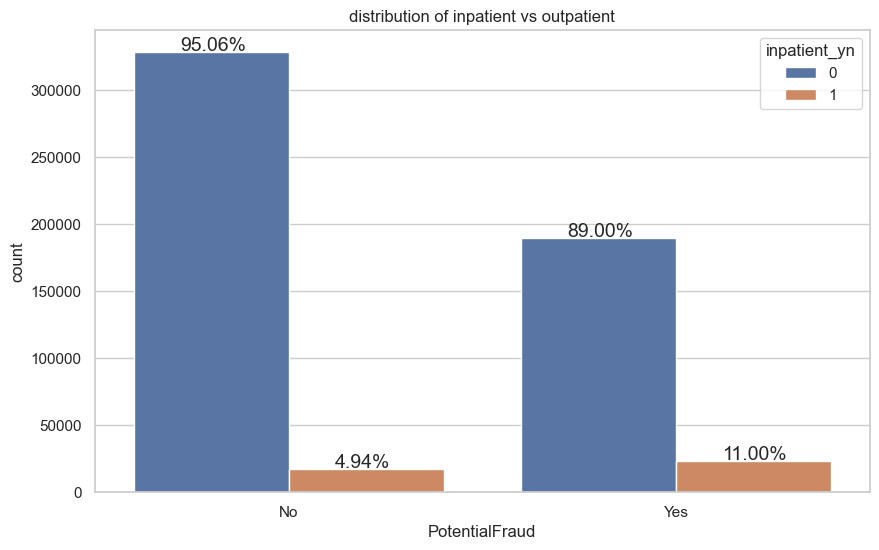

In [132]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='PotentialFraud',data=df, hue = 'inpatient_yn', order = df['PotentialFraud'].value_counts().index)
plt.title('distribution of inpatient vs outpatient')
percentage_with_hue(ax, df['PotentialFraud'], 2,2,-0.08,1000, 14)

In [ ]:
# Fraud vs ClaimAmtReimbursed

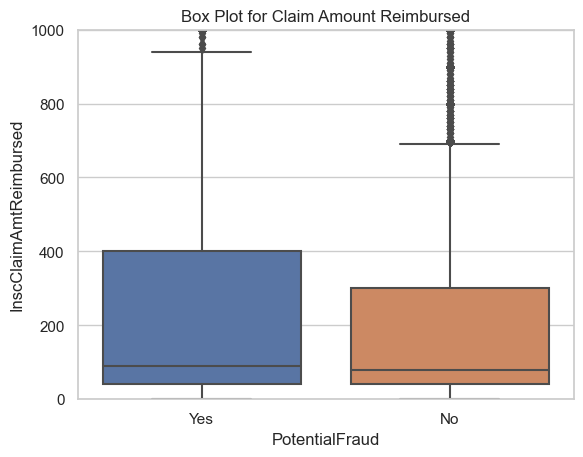

In [133]:
#Box Plot for InscClaimAmtReimbursed
sns.boxplot(x='PotentialFraud',y='InscClaimAmtReimbursed', data=df)
plt.ylim(0,1000)
plt.title('Box Plot for Claim Amount Reimbursed')
plt.show()

In [ ]:
# Fraud vs Patient Age


In [134]:
df['DOB'] = pd.to_datetime(df['DOB'] ,format = '%Y-%m-%d')
df['DOD'] = pd.to_datetime(df['DOD'],format = '%Y-%m-%d')

In [135]:
df['Patient_Age'] = round(((df['DOD'] - df['DOB']).dt.days)/365)
df.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-df['DOB']).dt.days)/365),inplace=True)

/Users/yinghe/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/yinghe/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


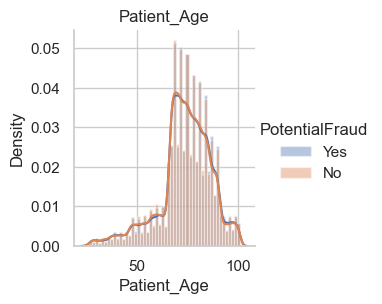

In [142]:
#Histogram of Patient Age
sns.FacetGrid(df, hue="PotentialFraud") \
   .map(sns.distplot, "Patient_Age") \
   .add_legend();
plt.title('Patient_Age')
plt.show()


### Feature Engineering

In [ ]:
#Attending Physician groupby Provider

In [143]:
num_AttendingPhysician = df[['Provider','AttendingPhysician']].groupby('Provider')['AttendingPhysician'].nunique()

In [144]:
provider_num_AttendingPhysician = pd.merge(num_AttendingPhysician,provider,on='Provider',how='left')

In [145]:
provider_num_AttendingPhysician

,Provider,AttendingPhysician,PotentialFraud
0,PRV51001,14,No
1,PRV51003,44,Yes
2,PRV51004,38,No
3,PRV51005,6,Yes
4,PRV51007,10,No
...,...,...,...
5405,PRV57759,1,No
5406,PRV57760,3,No
5407,PRV57761,2,No
5408,PRV57762,1,No


Text(0, 0.5, 'Count of Attending Physician')

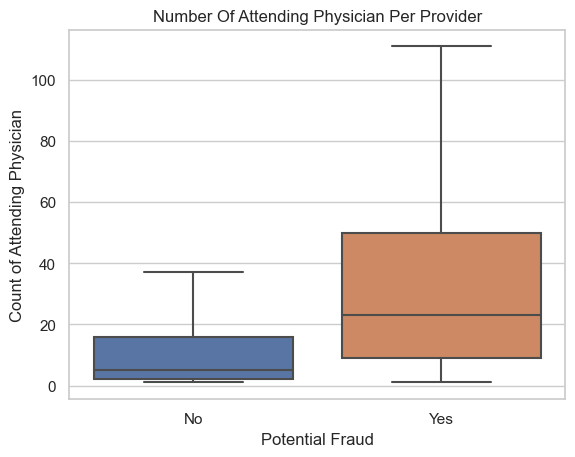

In [146]:
sns.boxplot(x='PotentialFraud', y='AttendingPhysician', data=provider_num_AttendingPhysician, showfliers=False)
plt.title('Number Of Attending Physician Per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Count of Attending Physician')

In [ ]:
# Unique Patient number groupby Provider

Text(0, 0.5, 'Count of Patients')

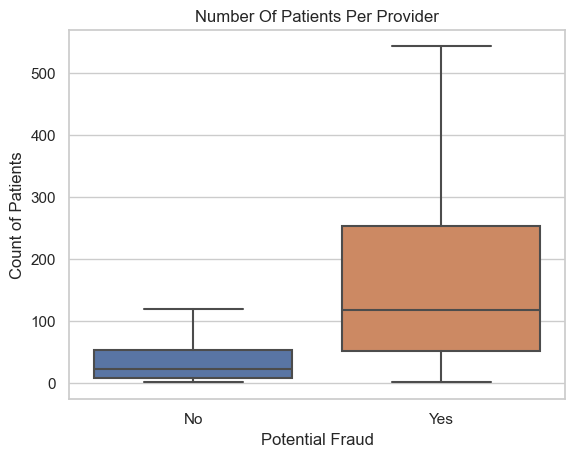

In [147]:
patients = df[['Provider','BeneID']].groupby('Provider')['BeneID'].nunique()
provider_patients = pd.merge(patients,provider, on = 'Provider',how = 'left')
sns.boxplot(x='PotentialFraud', y='BeneID', data=provider_patients, showfliers=False)
plt.title('Number Of Patients Per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Count of Patients')

Text(0, 0.5, 'Number of Patients')

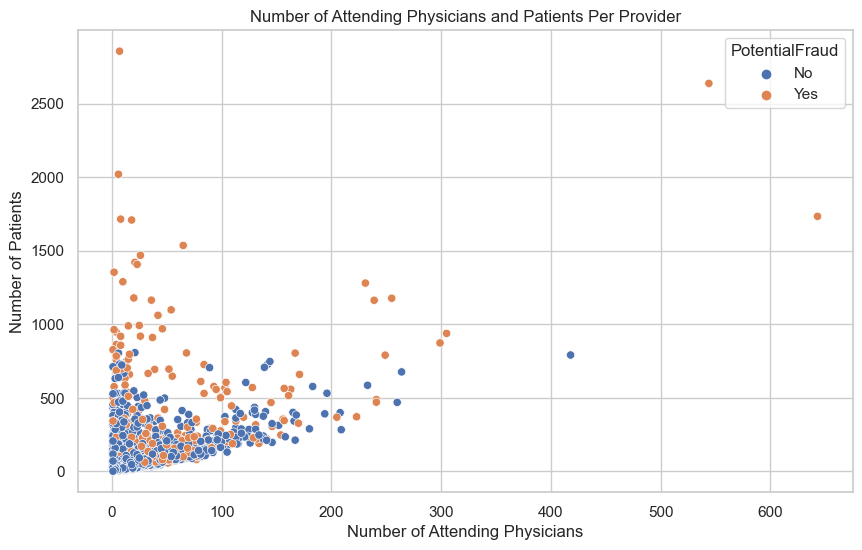

In [148]:
provider_attphysician_bene = pd.merge(provider_num_AttendingPhysician,patients,on='Provider')
f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='AttendingPhysician', y='BeneID', data = provider_attphysician_bene, hue='PotentialFraud')
plt.title('Number of Attending Physicians and Patients Per Provider')
plt.xlabel('Number of Attending Physicians')
plt.ylabel('Number of Patients')

In [ ]:
# Operating Physician groupby Provider


In [164]:
num_OperatingPhysician = df[['Provider','OperatingPhysician']].groupby('Provider')['OperatingPhysician'].nunique()
provider_num_OperatingPhysician = pd.merge(num_OperatingPhysician,provider,on='Provider',how='left')

Text(0, 0.5, 'Count of Operating Physician')

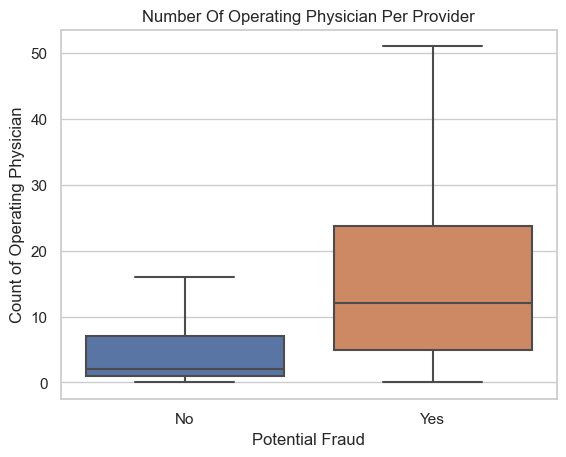

In [165]:
sns.boxplot(x='PotentialFraud', y='OperatingPhysician', data=provider_num_OperatingPhysician, showfliers=False)
plt.title('Number Of Operating Physician Per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Count of Operating Physician')

In [ ]:
# Other Physician grouby Provider


In [166]:
num_OtherPhysician = df[['Provider','OtherPhysician']].groupby('Provider')['OtherPhysician'].nunique()
provider_num_OtherPhysician = pd.merge(num_OtherPhysician,provider,on='Provider',how='left')

Text(0, 0.5, 'Count of Other Physician')

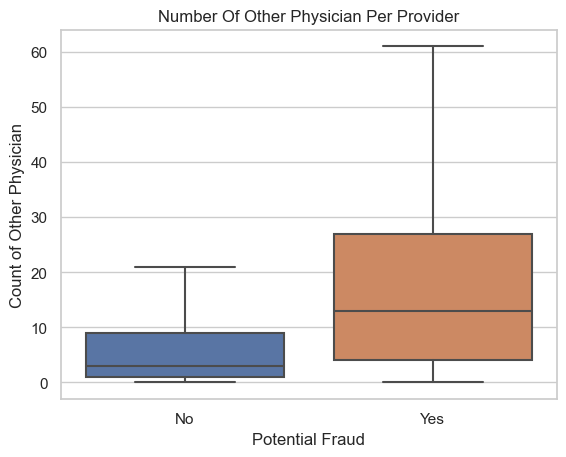

In [167]:
sns.boxplot(x='PotentialFraud', y='OtherPhysician', data=provider_num_OtherPhysician, showfliers=False)
plt.title('Number Of Other Physician Per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Count of Other Physician')

In [ ]:
# Total Physician

In [ ]:
# Total_ClmDiagnosisCode groupby Provider


In [168]:
df['Total_ClmDiagnosisCode'] = df['ClmDiagnosisCode_1']+df['ClmDiagnosisCode_2']+df['ClmDiagnosisCode_3']+df['ClmDiagnosisCode_4']+df['ClmDiagnosisCode_5']+df['ClmDiagnosisCode_6']+df['ClmDiagnosisCode_7']+df['ClmDiagnosisCode_8']+df['ClmDiagnosisCode_9']+df['ClmDiagnosisCode_10']

Text(0, 0.5, 'Count of ClmDiagnosisCodes')

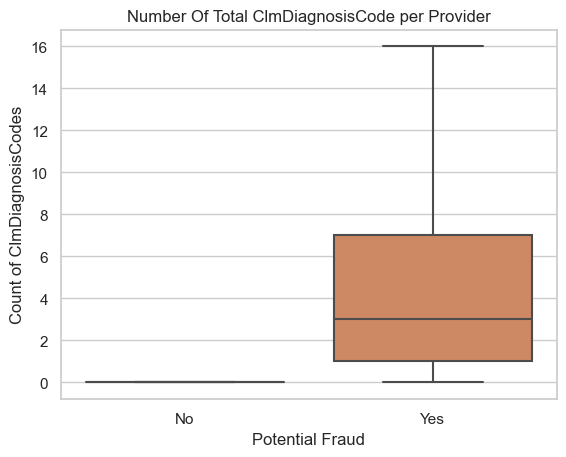

In [169]:
num_ClmDiagnosisCode = df[['Provider','Total_ClmDiagnosisCode']].groupby('Provider')['Total_ClmDiagnosisCode'].nunique()
provider_num_ClmDiagnosisCode = pd.merge(num_ClmDiagnosisCode,provider,on='Provider',how='left')
sns.boxplot(x='PotentialFraud', y='Total_ClmDiagnosisCode', data=provider_num_ClmDiagnosisCode, showfliers=False)
plt.title('Number Of Total ClmDiagnosisCode per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Count of ClmDiagnosisCodes')

In [ ]:
# Total_ClmProcedureCode groupby Provider


In [170]:
df['Total_ClmProcedureCode'] = df['ClmProcedureCode_1']+df['ClmProcedureCode_2']+df['ClmProcedureCode_3']+df['ClmProcedureCode_4']+df['ClmProcedureCode_5']+df['ClmProcedureCode_6']

Text(0, 0.5, 'Count of ClmProcedureCode')

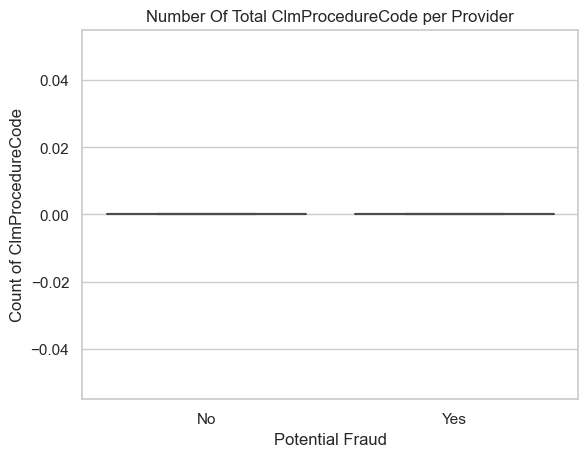

In [171]:
num_ClmProcedureCode = df[['Provider','Total_ClmProcedureCode']].groupby('Provider')['Total_ClmProcedureCode'].nunique()
provider_num_ClmProcedureCode = pd.merge(num_ClmProcedureCode,provider,on='Provider',how='left')
sns.boxplot(x='PotentialFraud', y='Total_ClmProcedureCode', data=provider_num_ClmProcedureCode, showfliers=False)
plt.title('Number Of Total ClmProcedureCode per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Count of ClmProcedureCode')

In [ ]:
# Patient Age groupby Provider


Text(0, 0.5, 'Patient Age')

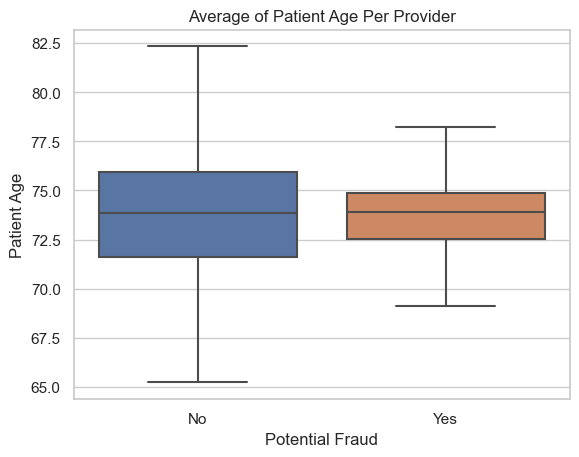

In [159]:
PatientAge = df[['Provider','Patient_Age']].groupby('Provider')['Patient_Age'].mean()
provider_PatientAge = pd.merge(PatientAge,provider, on = 'Provider',how = 'left')
sns.boxplot(x='PotentialFraud', y='Patient_Age', data=provider_PatientAge, showfliers=False)
plt.title('Average of Patient Age Per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Patient Age')

In [ ]:
#Variable Patient DOB_Year number groupby Provider


In [160]:
df['DOB_Year'] = df['DOB'].dt.year

Text(0, 0.5, 'Total unique Years of birth of patients')

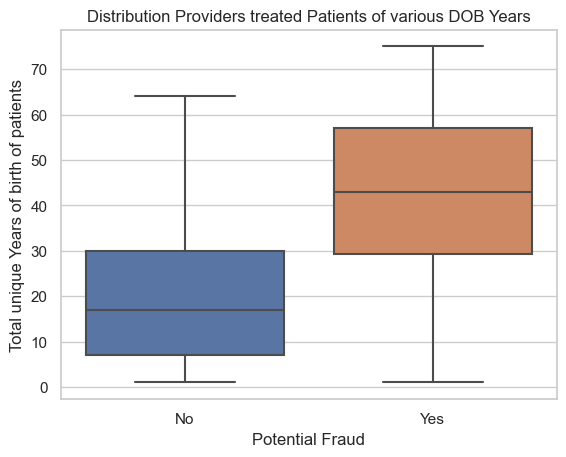

In [161]:
patient_DOBYear = df[['Provider','DOB_Year']].groupby('Provider')['DOB_Year'].nunique()
provider_patient_DOBYear = pd.merge(patient_DOBYear,provider, on = 'Provider',how = 'left')
sns.boxplot(x='PotentialFraud', y='DOB_Year', data=provider_patient_DOBYear, showfliers=False)
plt.title('Distribution Providers treated Patients of various DOB Years')
plt.xlabel('Potential Fraud')
plt.ylabel('Total unique Years of birth of patients')

In [ ]:
# Unique ClmAdmitDiagnosisCode groupby Provider


Text(0, 0.5, 'Count of Unique ClmAdmitDiagnosisCode')

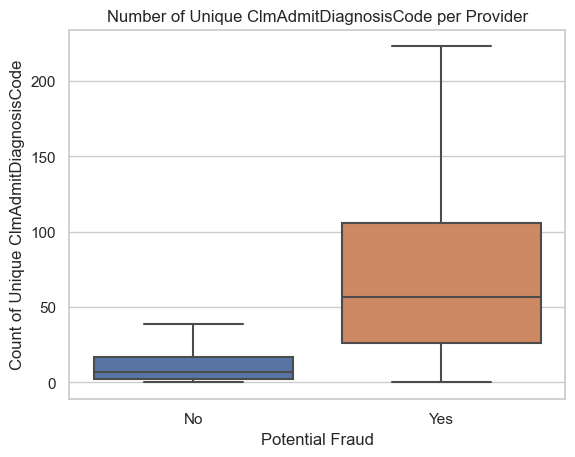

In [162]:
ClmAdmitDiagnosisCode = df[['Provider','ClmAdmitDiagnosisCode']].groupby('Provider')['ClmAdmitDiagnosisCode'].nunique()
provider_ClmAdmitDiagnosisCode = pd.merge(ClmAdmitDiagnosisCode,provider, on = 'Provider',how = 'left')
sns.boxplot(x='PotentialFraud', y='ClmAdmitDiagnosisCode', data=provider_ClmAdmitDiagnosisCode, showfliers=False)
plt.title('Number of Unique ClmAdmitDiagnosisCode per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Count of Unique ClmAdmitDiagnosisCode')

In [ ]:
# Unique DiagnosisGroupCode groupby Provider


Text(0, 0.5, 'Count of Unique DiagnosisGroupCode')

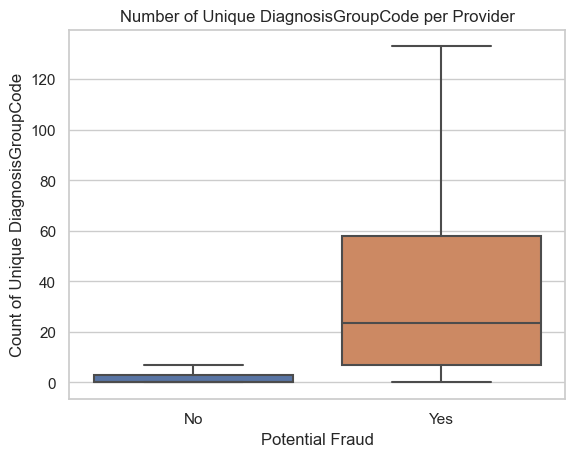

In [163]:
DiagnosisGroupCode = df[['Provider','DiagnosisGroupCode']].groupby('Provider')['DiagnosisGroupCode'].nunique()
provider_DiagnosisGroupCode = pd.merge(DiagnosisGroupCode,provider, on = 'Provider',how = 'left')
sns.boxplot(x='PotentialFraud', y='DiagnosisGroupCode', data=provider_DiagnosisGroupCode, showfliers=False)
plt.title('Number of Unique DiagnosisGroupCode per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Count of Unique DiagnosisGroupCode')

In [ ]:
# Avg Risk Score groupby Provider


Text(0, 0.5, 'Avg Risk Score')

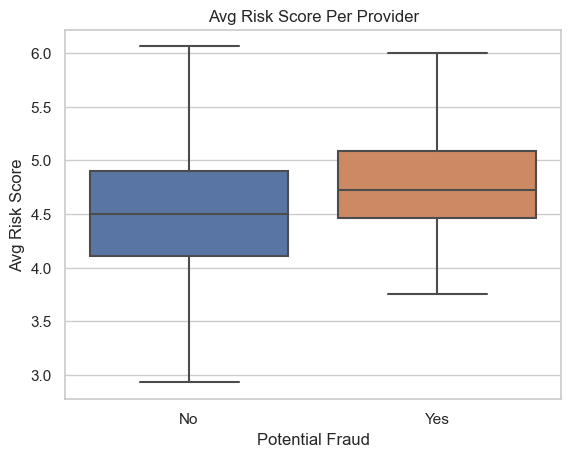

In [149]:
chronic = df.filter(regex='Chronic').replace(2,0).sum(axis=1).reset_index(name='Risk_Score')
patient_risk_score = pd.concat([chronic,df[['Provider','BeneID']]],axis=1).drop('index', axis=1)
avg_risk_score = patient_risk_score.groupby('Provider')['Risk_Score'].mean().reset_index().round(2)
provider_risk_score = pd.merge(avg_risk_score, provider, on='Provider', how='left')
sns.boxplot(x='PotentialFraud', y='Risk_Score', data = provider_risk_score, showfliers=False)
plt.title('Avg Risk Score Per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Avg Risk Score')

In [ ]:
# Unique Claim number groupby Provider

In [150]:
df[['Provider','ClaimID']]

,Provider,ClaimID
0,PRV55912,CLM46614
1,PRV55912,CLM565430
2,PRV55912,CLM34721
3,PRV55912,CLM72336
4,PRV55912,CLM73394
...,...,...
558206,PRV54050,CLM394122
558207,PRV54302,CLM184358
558208,PRV51577,CLM460770
558209,PRV53083,CLM306999


Text(0, 0.5, 'Count of Claims')

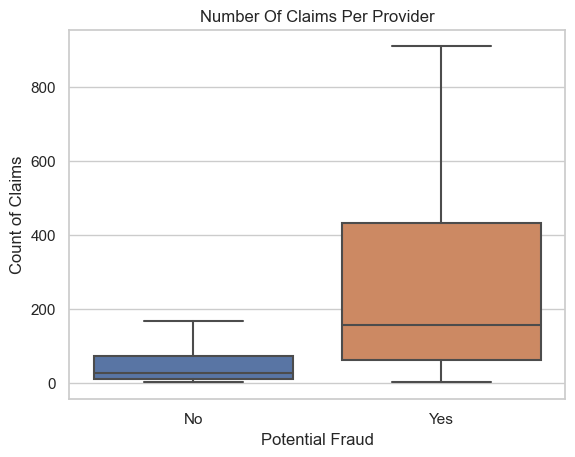

In [151]:
claims = df[['Provider','ClaimID']].groupby('Provider')['ClaimID'].nunique()
provider_claims = pd.merge(claims,provider, on = 'Provider',how = 'left')
sns.boxplot(x='PotentialFraud', y='ClaimID', data=provider_claims, showfliers=False)
plt.title('Number Of Claims Per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Count of Claims')

In [ ]:
# Claim Duration groupby Provider

In [152]:
df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'],format='%Y-%m-%d')
df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'],format='%Y-%m-%d')

In [153]:
duration = (df['ClaimEndDt']  - df['ClaimStartDt'] ).dt.days.reset_index(name='Duration')

In [154]:
claim_duration = pd.concat([duration,df[['Provider']]],axis=1).drop('index', axis=1)

In [155]:
avg_duration = claim_duration.groupby('Provider')['Duration'].mean().round(2)

In [156]:
provider_avg_duration = pd.merge(avg_duration,provider,on='Provider',how='left')

Text(0, 0.5, 'Avg Claim Duration')

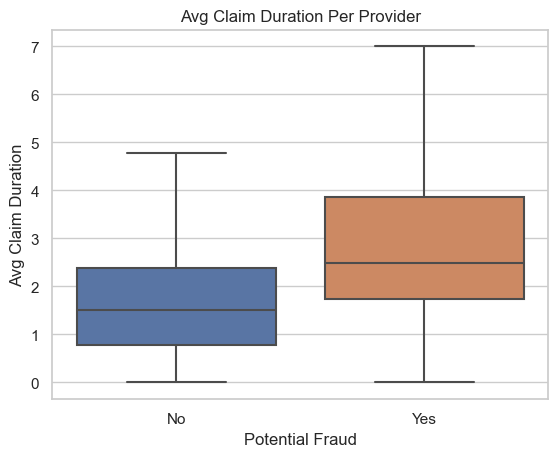

In [157]:
sns.boxplot(x='PotentialFraud', y='Duration', data=provider_avg_duration , showfliers=False)
plt.title('Avg Claim Duration Per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Avg Claim Duration')

In [ ]:
# Avg Claim reimbursed amount groupby Provider


Text(0, 0.5, 'Avg Insurance Claim Amount Reimbursed')

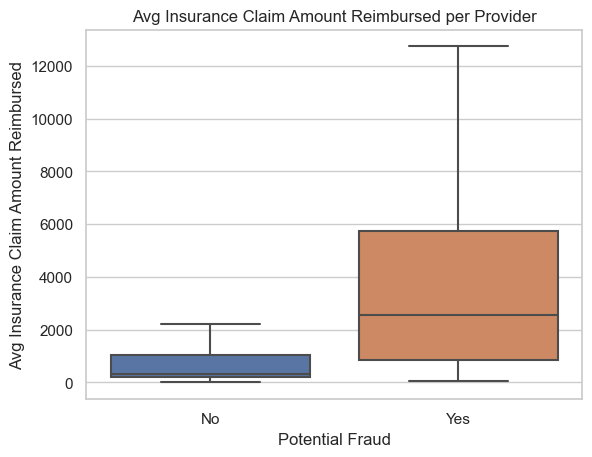

In [158]:
reimbursed = df[['Provider','InscClaimAmtReimbursed']].groupby('Provider')['InscClaimAmtReimbursed'].mean().round(2)
provider_reimbursed = pd.merge(reimbursed,provider, on = 'Provider',how = 'left')
sns.boxplot(x='PotentialFraud', y='InscClaimAmtReimbursed', data=provider_reimbursed, showfliers=False)
plt.title('Avg Insurance Claim Amount Reimbursed per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Avg Insurance Claim Amount Reimbursed')

In [ ]:
# AnnualReimbursementAmt groupby Provider


In [172]:
df['AnnualReimbursementAmt'] = df['IPAnnualReimbursementAmt']+df['IPAnnualDeductibleAmt']+df['OPAnnualReimbursementAmt']+df['OPAnnualDeductibleAmt']


Text(0, 0.5, 'Average of AnnualReimbursementAmt')

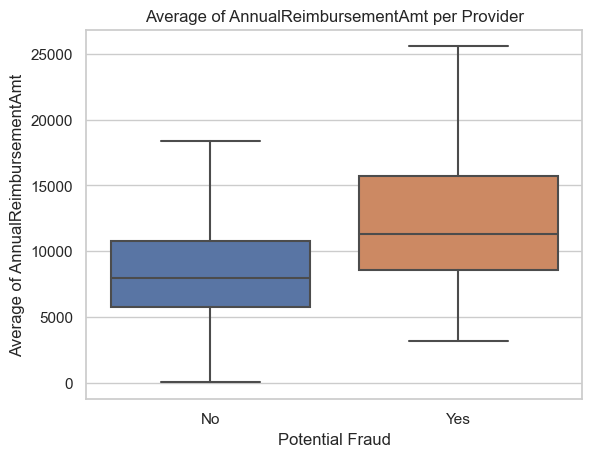

In [173]:
AnnualReimbursementAmt = df[['Provider','AnnualReimbursementAmt']].groupby('Provider')['AnnualReimbursementAmt'].mean()
provider_AnnualReimbursementAmt = pd.merge(AnnualReimbursementAmt,provider, on = 'Provider',how = 'left')
sns.boxplot(x='PotentialFraud', y='AnnualReimbursementAmt', data=provider_AnnualReimbursementAmt, showfliers=False)
plt.title('Average of AnnualReimbursementAmt per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Average of AnnualReimbursementAmt')

In [ ]:
# InsuranceCoverage groupby Provider


In [174]:
df['InsuranceCoverage'] = df['InscClaimAmtReimbursed']/(df['InscClaimAmtReimbursed']+df['DeductibleAmtPaid'])*100


Text(0, 0.5, 'InsuranceCoverage (%)')

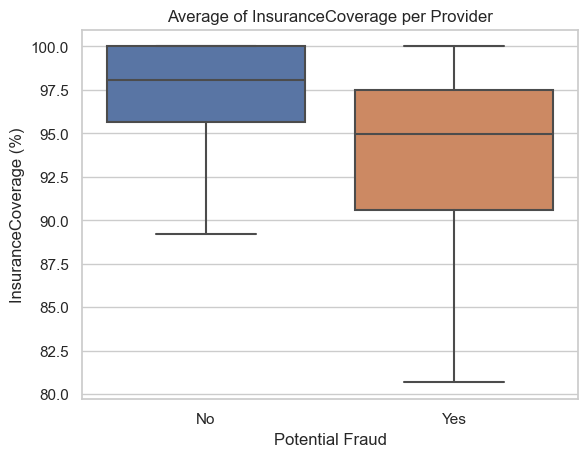

In [175]:
InsuranceCoverage = df[['Provider','InsuranceCoverage']].groupby('Provider')['InsuranceCoverage'].mean()
provider_InsuranceCoverage = pd.merge(InsuranceCoverage,provider, on = 'Provider',how = 'left')
sns.boxplot(x='PotentialFraud', y='InsuranceCoverage', data=provider_InsuranceCoverage, showfliers=False)
plt.title('Average of InsuranceCoverage per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('InsuranceCoverage (%)')

In [ ]:
# Number of State groupby Provider


In [176]:
num_State = df[['Provider','State']].groupby('Provider')['State'].nunique()
provider_num_State = pd.merge(num_State,provider,on='Provider',how='left')

Text(0, 0.5, 'Count of State')

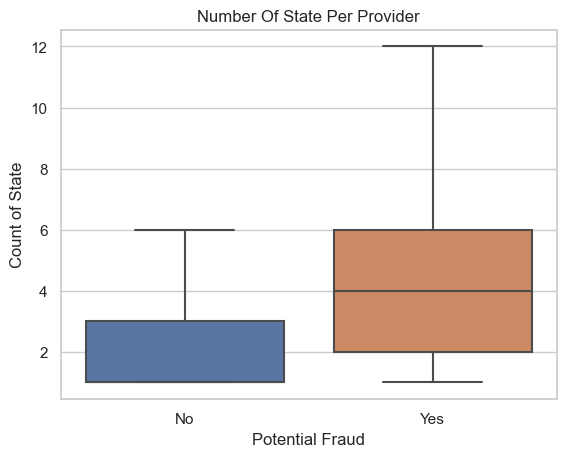

In [177]:
sns.boxplot(x='PotentialFraud', y='State', data=provider_num_State, showfliers=False)
plt.title('Number Of State Per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Count of State')

In [ ]:
# Number of County grouby Provider 

In [178]:
num_County = df[['Provider','County']].groupby('Provider')['County'].nunique()
provider_num_County = pd.merge(num_County,provider,on='Provider',how='left')

Text(0, 0.5, 'Count of County')

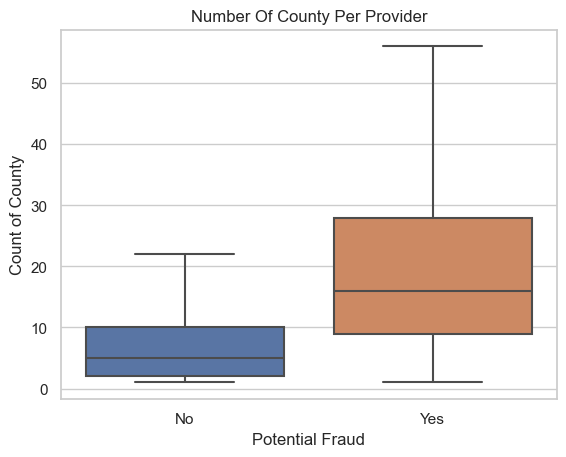

In [179]:
sns.boxplot(x='PotentialFraud', y='County', data=provider_num_County, showfliers=False)
plt.title('Number Of County Per Provider')
plt.xlabel('Potential Fraud')
plt.ylabel('Count of County')

### Create a new dataframe with groupby datasets

In [180]:
df_new = pd.DataFrame()

In [181]:
df_new['patients'] = df[['Provider','BeneID']].groupby('Provider')['BeneID'].nunique()
df_new['PatientAge'] = df[['Provider','Patient_Age']].groupby('Provider')['Patient_Age'].mean()
df_new['patient_DOBYear'] = df[['Provider','DOB_Year']].groupby('Provider')['DOB_Year'].nunique()
df_new['num_State'] = df[['Provider','State']].groupby('Provider')['State'].nunique()
df_new['num_County'] = df[['Provider','County']].groupby('Provider')['County'].nunique()
df_new['ClaimID'] = df[['Provider','ClaimID']].groupby('Provider')['ClaimID'].nunique()
df_new['avg_duration'] = claim_duration.groupby('Provider')['Duration'].mean().round(2)
df_new['reimbursed'] = df[['Provider','InscClaimAmtReimbursed']].groupby('Provider')['InscClaimAmtReimbursed'].mean().round(2)
df_new['num_AttendingPhysician'] = df[['Provider','AttendingPhysician']].groupby('Provider')['AttendingPhysician'].nunique()
df_new['num_OperatingPhysician'] = df[['Provider','OperatingPhysician']].groupby('Provider')['OperatingPhysician'].nunique()
df_new['num_OtherPhysician'] = df[['Provider','OtherPhysician']].groupby('Provider')['OtherPhysician'].nunique()
df_new['ClmAdmitDiagnosisCode'] = df[['Provider','ClmAdmitDiagnosisCode']].groupby('Provider')['ClmAdmitDiagnosisCode'].nunique()
df_new['DiagnosisGroupCode'] = df[['Provider','DiagnosisGroupCode']].groupby('Provider')['DiagnosisGroupCode'].nunique()
df_new['num_ClmDiagnosisCode'] = df[['Provider','Total_ClmDiagnosisCode']].groupby('Provider')['Total_ClmDiagnosisCode'].nunique()
df_new['AnnualReimbursementAmt'] = df[['Provider','AnnualReimbursementAmt']].groupby('Provider')['AnnualReimbursementAmt'].mean()
df_new['InsuranceCoverage'] = df[['Provider','InsuranceCoverage']].groupby('Provider')['InsuranceCoverage'].mean()


In [182]:
df_new

,patients,PatientAge,patient_DOBYear,num_State,num_County,ClaimID,avg_duration,reimbursed,num_AttendingPhysician,num_OperatingPhysician,num_OtherPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,num_ClmDiagnosisCode,AnnualReimbursementAmt,InsuranceCoverage
Provider,,,,,,,,,,,,,,,,
PRV51001,24,78.840000,19,1,7,25,1.44,4185.60,14,5,8,11,5,0,21582.240000,97.565571
PRV51003,117,70.022727,43,3,23,132,3.67,4588.41,44,7,22,58,58,5,11914.909091,91.216706
PRV51004,138,72.161074,47,9,28,149,1.43,350.13,38,19,26,25,0,0,7604.483221,97.848487
PRV51005,495,70.475536,66,4,26,1165,1.09,241.12,6,6,4,158,0,1,6749.216309,98.074661
PRV51007,58,69.291667,35,2,6,72,0.96,468.19,10,5,7,17,3,1,5694.444444,98.530327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57759,24,73.964286,15,1,2,28,2.14,380.00,1,1,1,3,0,0,8548.428571,98.340143
PRV57760,9,61.272727,9,1,3,22,0.32,216.82,3,2,2,7,0,0,5520.545455,100.000000
PRV57761,67,71.902439,36,1,2,82,1.39,225.24,2,5,2,16,0,0,11248.414634,93.597884


In [183]:
df_new.columns

Index(['patients', 'PatientAge', 'patient_DOBYear', 'num_State', 'num_County',
       'ClaimID', 'avg_duration', 'reimbursed', 'num_AttendingPhysician',
       'num_OperatingPhysician', 'num_OtherPhysician', 'ClmAdmitDiagnosisCode',
       'DiagnosisGroupCode', 'num_ClmDiagnosisCode', 'AnnualReimbursementAmt',
       'InsuranceCoverage'],
      dtype='object')

In [185]:
df_new.dtypes

patients                    int64
PatientAge                float64
patient_DOBYear             int64
num_State                   int64
num_County                  int64
ClaimID                     int64
avg_duration              float64
reimbursed                float64
num_AttendingPhysician      int64
num_OperatingPhysician      int64
num_OtherPhysician          int64
ClmAdmitDiagnosisCode       int64
DiagnosisGroupCode          int64
num_ClmDiagnosisCode        int64
AnnualReimbursementAmt    float64
InsuranceCoverage         float64
dtype: object

In [186]:
df_new.isnull().sum()

patients                   0
PatientAge                 0
patient_DOBYear            0
num_State                  0
num_County                 0
ClaimID                    0
avg_duration               0
reimbursed                 0
num_AttendingPhysician     0
num_OperatingPhysician     0
num_OtherPhysician         0
ClmAdmitDiagnosisCode      0
DiagnosisGroupCode         0
num_ClmDiagnosisCode       0
AnnualReimbursementAmt     0
InsuranceCoverage         13
dtype: int64

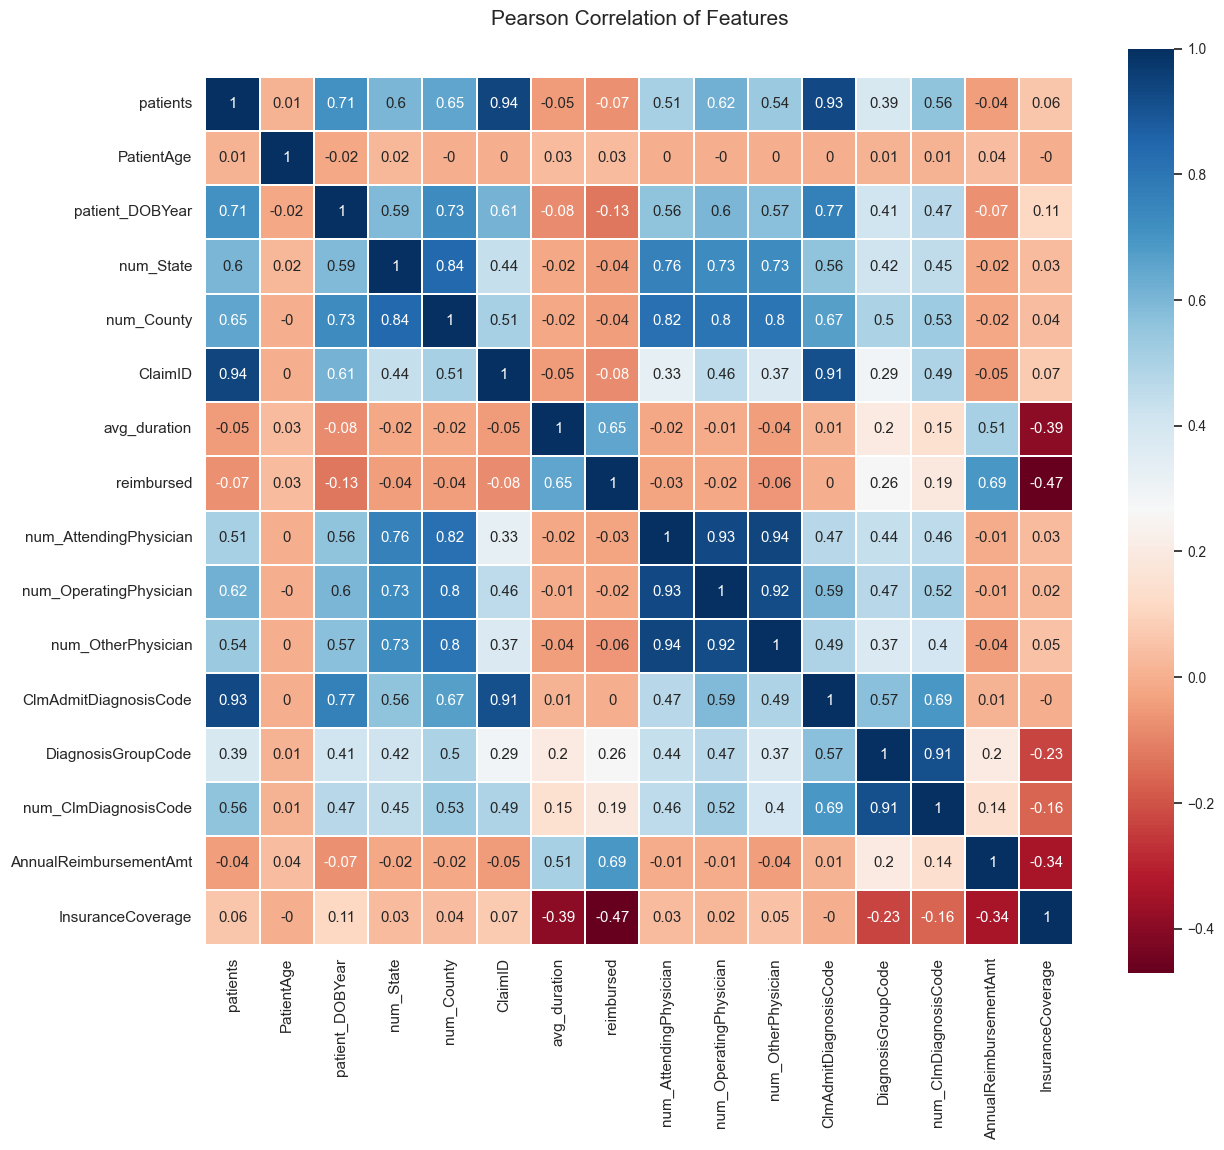

In [187]:
# Analysis feature correlation

def pea_corr(df_new):
    '''helper function for correlation analysis'''
    colormap = plt.cm.RdBu
    corr = df_new.astype(float).corr()

    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.set(font_scale=0.9)
    sns.heatmap(round(corr,2),linewidths=0.1,vmax=1.0, square=True, 
                cmap=colormap, linecolor='white', annot=True)
    plt.show()

pea_corr(df_new)

In [ ]:
# Keep: patients; total physician

# Drop: ClaimID, num_ClamDiagnosisCode, ClmAdminDiagnosisCode, County, 3 types of Physicians --> total

In [188]:
df_new["num_TotalPhysician"] = df_new["num_AttendingPhysician"] + df_new["num_OperatingPhysician"] + df_new["num_OtherPhysician"]
df_new = df_new.drop(columns=["ClaimID", "num_ClmDiagnosisCode", "ClmAdmitDiagnosisCode", "num_County", "num_AttendingPhysician", "num_OperatingPhysician", "num_OtherPhysician"])
df_new

,patients,PatientAge,patient_DOBYear,num_State,avg_duration,reimbursed,DiagnosisGroupCode,AnnualReimbursementAmt,InsuranceCoverage,num_TotalPhysician
Provider,,,,,,,,,,
PRV51001,24,78.840000,19,1,1.44,4185.60,5,21582.240000,97.565571,27
PRV51003,117,70.022727,43,3,3.67,4588.41,58,11914.909091,91.216706,73
PRV51004,138,72.161074,47,9,1.43,350.13,0,7604.483221,97.848487,83
PRV51005,495,70.475536,66,4,1.09,241.12,0,6749.216309,98.074661,16
PRV51007,58,69.291667,35,2,0.96,468.19,3,5694.444444,98.530327,22
...,...,...,...,...,...,...,...,...,...,...
PRV57759,24,73.964286,15,1,2.14,380.00,0,8548.428571,98.340143,3
PRV57760,9,61.272727,9,1,0.32,216.82,0,5520.545455,100.000000,7
PRV57761,67,71.902439,36,1,1.39,225.24,0,11248.414634,93.597884,9


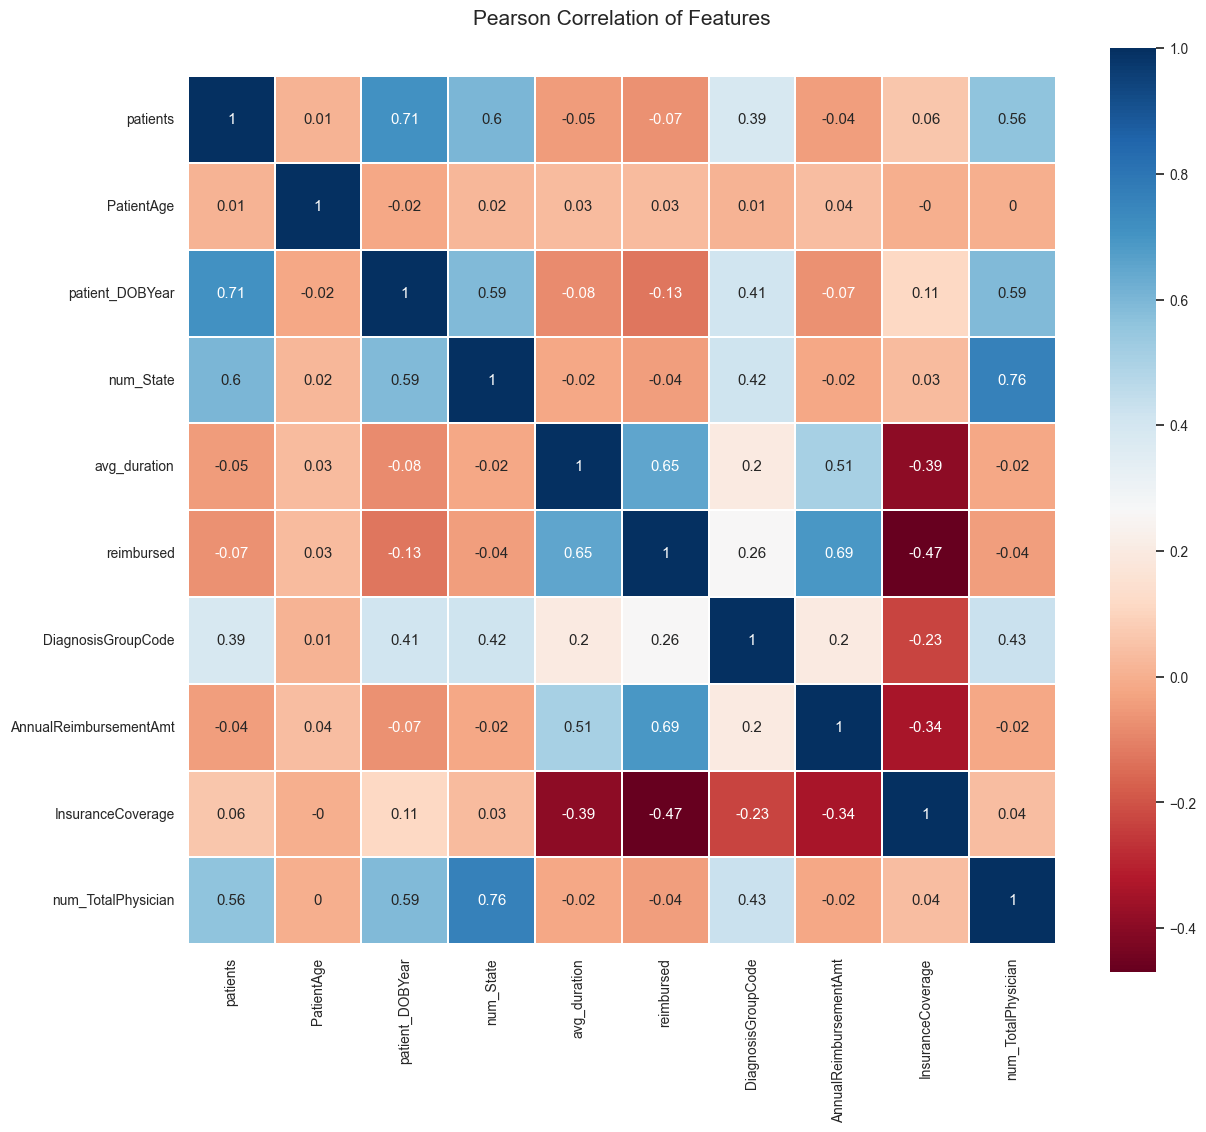

In [189]:
def pea_corr(df_new):
    '''helper function for correlation analysis'''
    colormap = plt.cm.RdBu
    corr = df_new.astype(float).corr()

    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.set(font_scale=0.9)
    sns.heatmap(round(corr,2),linewidths=0.1,vmax=1.0, square=True, 
                cmap=colormap, linecolor='white', annot=True)
    plt.show()

pea_corr(df_new)

In [1]:
df_new.reset_index(inplace=True)

NameError: name 'df_new' is not defined